# Analysis and Modeling

In this notebook, we explore answers to some questions and discuss our findings.

<div class="toc"><ul class="toc-item"><li><span><a href="#How-does-listing-price-relate-to-location?" data-toc-modified-id="How-does-listing-price-relate-to-location?-1">How does listing price relate to location?</a></span><ul class="toc-item"><li><span><a href="#How-do-listings-prices-of-compare-across-each-of-the-three-cities?" data-toc-modified-id="How-do-listings-prices-of-compare-across-each-of-the-three-cities?-1.1">How do listings prices of compare across each of the three cities?</a></span></li><li><span><a href="#Which-neighborhoods-have-the-highest-and-lowest-priced-listings?" data-toc-modified-id="Which-neighborhoods-have-the-highest-and-lowest-priced-listings?-1.2">Which neighborhoods have the highest and lowest priced listings?</a></span></li><li><span><a href="#Conclusions" data-toc-modified-id="Conclusions-1.3">Conclusions</a></span></li></ul></li><li><span><a href="#How-does-listing-price-change-over-time?" data-toc-modified-id="How-does-listing-price-change-over-time?-2">How does listing price change over time?</a></span><ul class="toc-item"><li><span><a href="#What-trends-in-price-can-we-identify-across-all-three-cities?" data-toc-modified-id="What-trends-in-price-can-we-identify-across-all-three-cities?-2.1">What trends in price can we identify across all three cities?</a></span></li><li><span><a href="#What-trends-in-price-can-we-identify-within-cities?" data-toc-modified-id="What-trends-in-price-can-we-identify-within-cities?-2.2">What trends in price can we identify within cities?</a></span></li><li><span><a href="#Conclusions" data-toc-modified-id="Conclusions-2.3">Conclusions</a></span></li></ul></li><li><span><a href="#How-does-overall-guest-satisfaction-relate-to-location?" data-toc-modified-id="How-does-overall-guest-satisfaction-relate-to-location?-3">How does overall guest satisfaction relate to location?</a></span><ul class="toc-item"><li><span><a href="#How-does-guest-satisfaction-compare-across-each-of-the-three-cities?" data-toc-modified-id="How-does-guest-satisfaction-compare-across-each-of-the-three-cities?-3.1">How does guest satisfaction compare across each of the three cities?</a></span></li><li><span><a href="#Which-neighborhoods-have-the-highest-and-lowest-guest-satisfaction?" data-toc-modified-id="Which-neighborhoods-have-the-highest-and-lowest-guest-satisfaction?-3.2">Which neighborhoods have the highest and lowest guest satisfaction?</a></span></li><li><span><a href="#How-does-the-price-of-listings-in-a-neighbourhood-relate-to-guest-satisfaction?" data-toc-modified-id="How-does-the-price-of-listings-in-a-neighbourhood-relate-to-guest-satisfaction?-3.3">How does the price of listings in a neighbourhood relate to guest satisfaction?</a></span></li><li><span><a href="#Conclusions" data-toc-modified-id="Conclusions-3.4">Conclusions</a></span></li></ul></li><li><span><a href="#What-are-the-most-important-listing-features-affecting-guest-satisfaction?" data-toc-modified-id="What-are-the-most-important-listing-features-affecting-guest-satisfaction?-4">What are the most important listing features affecting guest satisfaction?</a></span><ul class="toc-item"><li><span><a href="#Getting-features" data-toc-modified-id="Getting-features-4.1">Getting features</a></span></li><li><span><a href="#Exploring-features" data-toc-modified-id="Exploring-features-4.2">Exploring features</a></span></li><li><span><a href="#Exploring-features-vs.-response" data-toc-modified-id="Exploring-features-vs.-response-4.3">Exploring features vs. response</a></span></li><li><span><a href="#Prediction" data-toc-modified-id="Prediction-4.4">Prediction</a></span><ul class="toc-item"><li><span><a href="#scikit-learn-regressors-on-original-features" data-toc-modified-id="scikit-learn-regressors-on-original-features-4.4.1"><code>scikit-learn</code> regressors on original features</a></span></li><li><span><a href="#xgboost-regressors-on-original-features." data-toc-modified-id="xgboost-regressors-on-original-features.-4.4.2"><code>xgboost</code> regressors on original features.</a></span></li><li><span><a href="#scikit-learn-and-xgboost-regressors-on-transformed-quantitative-features" data-toc-modified-id="scikit-learn-and-xgboost-regressors-on-transformed-quantitative-features-4.4.3"><code>scikit-learn</code> and <code>xgboost</code> regressors on transformed quantitative features</a></span></li></ul></li><li><span><a href="#Evaluation" data-toc-modified-id="Evaluation-4.5">Evaluation</a></span></li><li><span><a href="#Interpretation" data-toc-modified-id="Interpretation-4.6">Interpretation</a></span></li><li><span><a href="#Model-Improvement" data-toc-modified-id="Model-Improvement-4.7">Model Improvement</a></span></li><li><span><a href="#Conclusions" data-toc-modified-id="Conclusions-4.8">Conclusions</a></span></li></ul></li></ul></div>

In [2]:
# standard imports
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# other imports
import warnings
import time
import scipy.stats as ss
import statsmodels.api as sm
import geopandas as gpd
import datetime
import descartes
from collections import defaultdict
from itertools import product
from functools import partial
from copy import deepcopy

# estimators
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.dummy import DummyRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor, XGBRFRegressor

# settings
sns.set_style('darkgrid')
warnings.simplefilter(action='ignore', category=FutureWarning)

We'll load the cleaned data sets (created in the notebook [wrangling.ipynb](./wrangling.ipynb) or by running the script `wrangle.py`)

In [3]:
listings_df = pd.read_hdf('data/listings.h5')
listings_df.head()

id  accommodates  amen_24_hour_checkin  amen_air_conditioning  \
city                                                                         
seattle 0  2318             9                 False                  False   
        1  6606             2                  True                   True   
        2  9419             2                 False                   True   
        3  9460             2                 False                   True   
        4  9531             4                  True                  False   

           amen_bathtub  amen_bbq_grill  amen_bed_linens  amen_cable_tv  \
city                                                                      
seattle 0         False           False            False          False   
        1         False           False             True          False   
        2         False           False             True          False   
        3         False           False             True           True   
        4         False            True             True           True   

           amen_carbon_monoxide_detector  amen_childrens_books_and_toys  ...  \
city                                                                     ...   
seattle 0                           True                           True  ...   
        1                           True                          False  ...   
        2                          False                          False  ...   
        3                           True                          False  ...   
        4                           True                          False  ...   

           review_scores_accuracy  review_scores_checkin  \
city                                                       
seattle 0                      10                     10   
        1                       9                     10   
        2                      10                     10   
        3                      10                     10   
        4                      10                     10   

           review_scores_cleanliness  review_scores_communication  \
city                                                                
seattle 0                         10                           10   
        1                          9                           10   
        2                         10                           10   
        3                         10                           10   
        4                         10                           10   

           review_scores_location  review_scores_rating  review_scores_value  \
city                                                                           
seattle 0                      10                   100                   10   
        1                      10                    92                    9   
        2                      10                    93                   10   
        3                      10                    98                   10   
        4                      10                   100                   10   

           reviews_per_month        room_type  security_deposit  
city                                                             
seattle 0               0.23  Entire home/apt             500.0  
        1               1.16  Entire home/apt             200.0  
        2               1.27     Private room             100.0  
        3               3.63     Private room               0.0  
        4               0.40  Entire home/apt             300.0  

[5 rows x 98 columns]

In [4]:
listings_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 15983 entries, ('seattle', 0) to ('vancouver', 6174)
Data columns (total 98 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   id                                            15983 non-null  int64         
 1   accommodates                                  15983 non-null  int64         
 2   amen_24_hour_checkin                          15983 non-null  bool          
 3   amen_air_conditioning                         15983 non-null  bool          
 4   amen_bathtub                                  15983 non-null  bool          
 5   amen_bbq_grill                                15983 non-null  bool          
 6   amen_bed_linens                               15983 non-null  bool          
 7   amen_cable_tv                                 15983 non-null  bool          
 8   amen_carbon_monoxide_detector          

In [5]:
calendar_df = pd.read_hdf('data/calendar.h5')
calendar_df.head()

listing_id  available       date  maximum_nights  minimum_nights  \
city                                                                          
seattle 0      788146      False 2020-02-22           180.0            30.0   
        1      340706       True 2020-02-22            60.0             2.0   
        2      340706       True 2020-02-23            60.0             2.0   
        3      340706       True 2020-02-24            60.0             2.0   
        4      340706       True 2020-02-25            60.0             2.0   

           price  
city              
seattle 0   68.0  
        1   90.0  
        2   90.0  
        3   90.0  
        4   90.0

In [6]:
calendar_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 6586070 entries, ('seattle', 0) to ('vancouver', 2265188)
Data columns (total 6 columns):
 #   Column          Dtype         
---  ------          -----         
 0   listing_id      int64         
 1   available       bool          
 2   date            datetime64[ns]
 3   maximum_nights  float64       
 4   minimum_nights  float64       
 5   price           float64       
dtypes: bool(1), datetime64[ns](1), float64(3), int64(1)
memory usage: 309.9+ MB


All prices are in USD to enable comparison.

## How does listing price relate to location?

All prices are in USD to enable comparison.

Before exploring these questions, let's inspect price a little more carefully

In [7]:
listings_df['price'].describe()

count    15983.000000
mean       137.886442
std        170.924443
min          0.000000
25%         70.000000
50%        100.000000
75%        152.000000
max       9896.000000
Name: price, dtype: float64

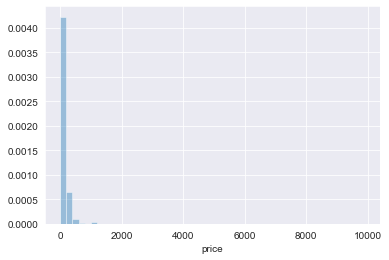

In [8]:
sns.distplot(listings_df['price'], kde=False, norm_hist=True)

This is an extremely skewed distribution -- and some of these values of price might be problematic. 

In [9]:
# listings with zero price
listings_df[listings_df['price'] == 0]

id  accommodates  amen_24_hour_checkin  \
city                                                          
seattle  2866  18670293             2                 False   
         2975  19293242             6                 False   
portland 2101  20477753             2                 False   
         4376  40187265             3                 False   

               amen_air_conditioning  amen_bathtub  amen_bbq_grill  \
city                                                                 
seattle  2866                  False         False           False   
         2975                  False         False           False   
portland 2101                   True          True           False   
         4376                  False         False           False   

               amen_bed_linens  amen_cable_tv  amen_carbon_monoxide_detector  \
city                                                                           
seattle  2866            False          False                           True   
         2975            False          False                           True   
portland 2101             True          False                           True   
         4376            False          False                           True   

               amen_childrens_books_and_toys  ...  review_scores_accuracy  \
city                                          ...                           
seattle  2866                          False  ...                      10   
         2975                          False  ...                      10   
portland 2101                          False  ...                      10   
         4376                          False  ...                       9   

               review_scores_checkin  review_scores_cleanliness  \
city                                                              
seattle  2866                     10                         10   
         2975                     10                          9   
portland 2101                     10                         10   
         4376                     10                          9   

               review_scores_communication  review_scores_location  \
city                                                                 
seattle  2866                           10                      10   
         2975                           10                       9   
portland 2101                           10                      10   
         4376                           10                       9   

               review_scores_rating  review_scores_value  reviews_per_month  \
city                                                                          
seattle  2866                   100                   10               0.18   
         2975                    92                    9               0.39   
portland 2101                    99                   10               6.90   
         4376                    94                    9               3.50   

                     room_type  security_deposit  
city                                              
seattle  2866  Entire home/apt            1000.0  
         2975  Entire home/apt               0.0  
portland 2101  Entire home/apt             100.0  
         4376  Entire home/apt               0.0  

[4 rows x 98 columns]

Given there are only 4 listings with zero price, we'll drop these

In [10]:
listings_df = listings_df[listings_df['price'] != 0]

And now we can look at the distribution of the natural logarithm of price

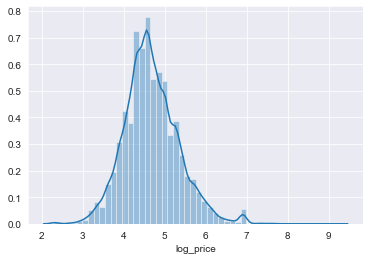

In [11]:
sns.distplot(np.log(listings_df['price']), norm_hist=True)
plt.xlabel('log_price');

Price appears approximately lognormal. 

### How do listings prices of compare across each of the three cities?

First we'd like to look at differences in listing prices between cities. Given how peaked/skewed the distribution of price is we'll look at logarithm of price

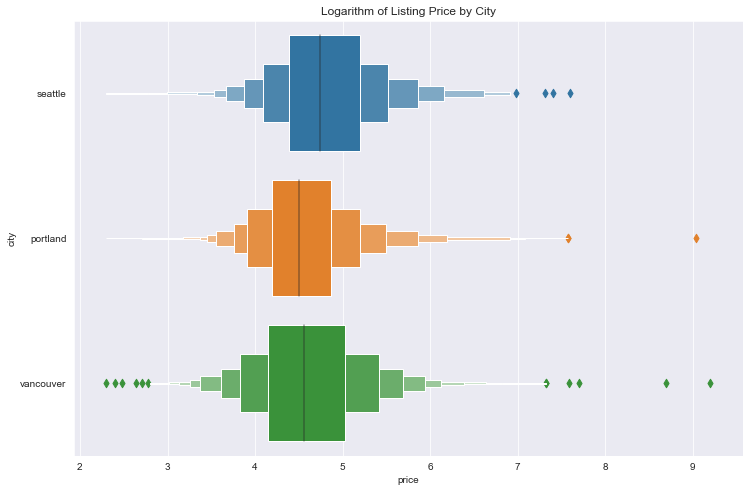

In [12]:
# boxen plots of log of price by city
plt.figure(figsize=(12, 8))
df = listings_df.reset_index()
sns.boxenplot(y=df['city'], x=np.log(df['price']), orient='h')
plt.title('Logarithm of Listing Price by City');

The distributions appear quite similar, with some notable outliers.

In [13]:
# summary statistics of price
summary_df = listings_df.groupby(['city'])['price'].describe()
summary_df = summary_df.drop(columns=['mean', 'std'])
summary_df['median'] = listings_df.groupby(['city'])['price'].median()
summary_df['mad'] = \
    listings_df.groupby(['city'])['price'].agg(ss.median_absolute_deviation)
summary_df.sort_values(by='median')

,count,min,25%,50%,75%,max,median,mad
city,,,,,,,,
portland,4129.0,10.0,66.0,90.0,130.0,8400.0,90.0,44.4780
vancouver,5320.0,10.0,63.0,95.0,152.0,9896.0,95.0,56.3388
seattle,6530.0,10.0,80.0,115.0,180.0,2000.0,115.0,65.2344


Here we've used the median as a measure of central tendency, and [median absolute devation (mad)](https://en.wikipedia.org/wiki/Median_absolute_deviation) as a measure of dispersion due to the skewness of price and presence of outliers. 

We've sorted by median price but most of the other summary statistics are in the same order. There seems to be a ranking here, namely Portland <  Seattle < Vancouver from lowest to highest.

### Which neighborhoods have the highest and lowest priced listings?

To address this question, we'll first create a [geopandas](https://geopandas.org/index.html) `GeoDataFrame` with median and median absolute deviation of price for all cities and neighborhoods. We'll also include a count of listings. This geodataframe will also contain neighbourhood geodata so we can make use of its plotting methods.

In [14]:
def get_city_nb_gdf(listings_df, cols, num_listings=False, num_reviews=False):
    """GeoDataFrame of median and mad of column grouped by city and neighborhood."""
    # load city neighbourhood geodata
    port_nb = gpd.read_file('data/portland_neighbourhoods.geojson').set_index(keys=['neighbourhood'])
    sea_nb = gpd.read_file('data/seattle_neighbourhoods.geojson').set_index(keys=['neighbourhood'])
    van_nb = gpd.read_file('data/vancouver_neighbourhoods.geojson').set_index(keys=['neighbourhood'])
    
    # create city geodataframe with neighbourhood geodata
    city_nb = pd.concat([port_nb, sea_nb, van_nb], 
                        keys=['portland', 'seattle', 'vancouver'],
                        names=['city', 'neighbourhood'])
    city_nb = city_nb.drop(columns=['neighbourhood_group'])
    crs = {'init': 'epsg:4326'}
    city_nb_gdf = gpd.GeoDataFrame(city_nb, crs=crs)
    
    # get median and absolute value of columns grouped by neighborhood
    gpby = listings_df.groupby(['city', 'neighbourhood_cleansed'])
    df = pd.DataFrame(index=city_nb_gdf.index)
    for col in cols:
        df[col + '_median'] = gpby[col].agg(np.median)
        df[col + '_mad'] = gpby[col].agg(ss.median_absolute_deviation)
    
    # add number of reviews and listings
    if num_listings:
        df['num_listings'] = gpby['id'].count()
    if num_reviews:
        df['num_reviews'] = gpby['number_of_reviews'].count()
    
    city_nb_gdf = city_nb_gdf.merge(df, how='inner', 
                                    left_index=True, right_index=True)
    
    # drop duplicates due to slight differences in geodata
    city_nb_gdf = city_nb_gdf.loc[city_nb_gdf.index.unique()]
    # drop certain duplicates by hand that won't response to above method if needed
    try:
        indices = [('portland', 'Ardenwald-Johnson Creek'), ('vancouver', 'Strathcona')]
        city_nb_gdf = city_nb_gdf.drop(index=indices)
    except KeyError:
        pass
    
    return city_nb_gdf

In [15]:
city_nb_price_gdf = get_city_nb_gdf(listings_df, cols=['price'], num_listings=True)
city_nb_price_gdf.head()

geometry  \
city     neighbourhood                                                          
portland Alameda            MULTIPOLYGON Z (((-122.64194 45.55542 0.00000,...   
         Arbor Lodge        MULTIPOLYGON Z (((-122.67858 45.57721 0.00000,...   
         Argay              MULTIPOLYGON Z (((-122.51026 45.56615 0.00000,...   
         Arlington Heights  MULTIPOLYGON Z (((-122.70194 45.52415 0.00000,...   
         Arnold Creek       MULTIPOLYGON Z (((-122.69870 45.43255 0.00000,...   

                            price_median  price_mad  num_listings  
city     neighbourhood                                             
portland Alameda                    89.5    40.0302          24.0  
         Arbor Lodge                85.0    31.1346          71.0  
         Argay                      70.0    45.9606           5.0  
         Arlington Heights         100.0    37.0650           7.0  
         Arnold Creek               75.0    38.5476           5.0

Next we'll plot the median prices by neighborhood.

In [16]:
def city_nb_plot(city_nb_gdf, col, figsize=(20, 10),  cmap='Blues', title=''):
    """Plot column over n"""
    fig, ax = plt.subplots(figsize=figsize)
    city_nb_gdf.plot(column=col, ax=ax, cmap=cmap, legend=True)
    if title:
        plt.title(title)

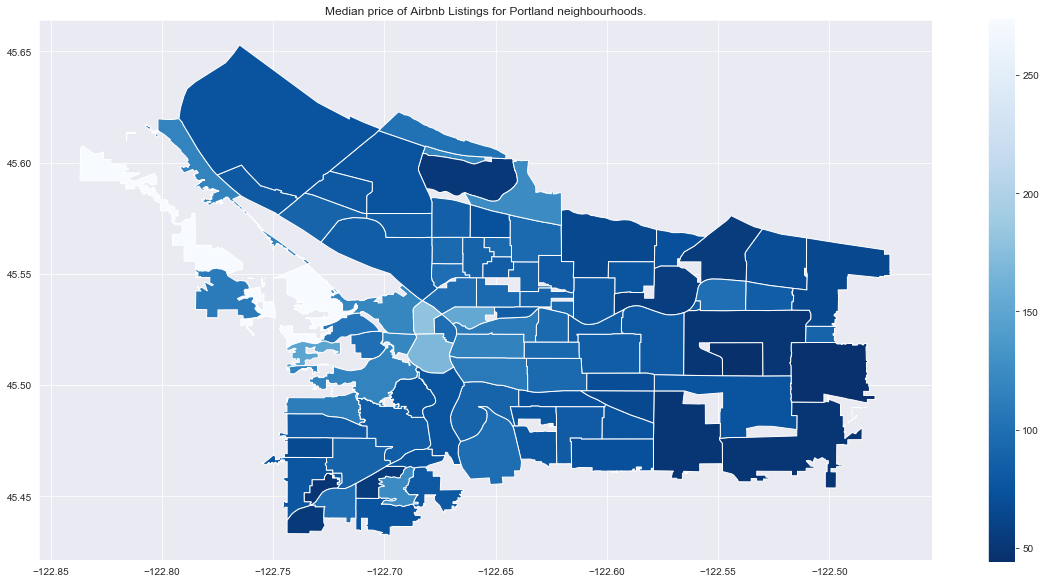

In [17]:
title = 'Median price of Airbnb Listings for Portland neighbourhoods.'
city_nb_plot(city_nb_price_gdf.loc['portland'], 'price_median', 
             cmap='Blues_r', title=title)

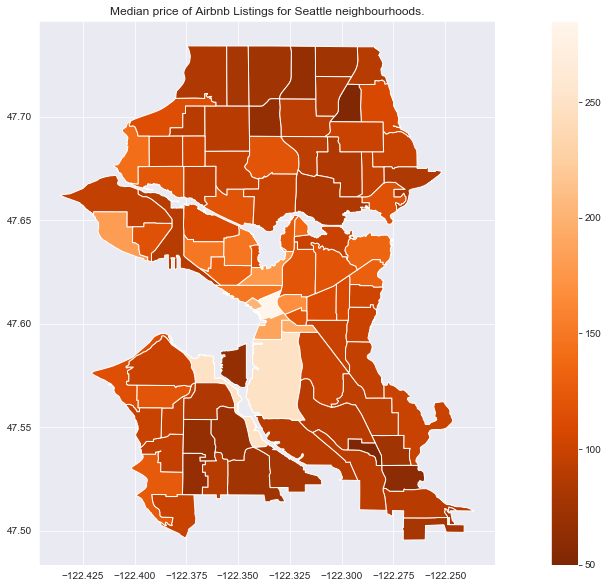

In [18]:
title = 'Median price of Airbnb Listings for Seattle neighbourhoods.'
city_nb_plot(city_nb_price_gdf.loc['seattle'], 'price_median', 
             cmap='Oranges_r', title=title)

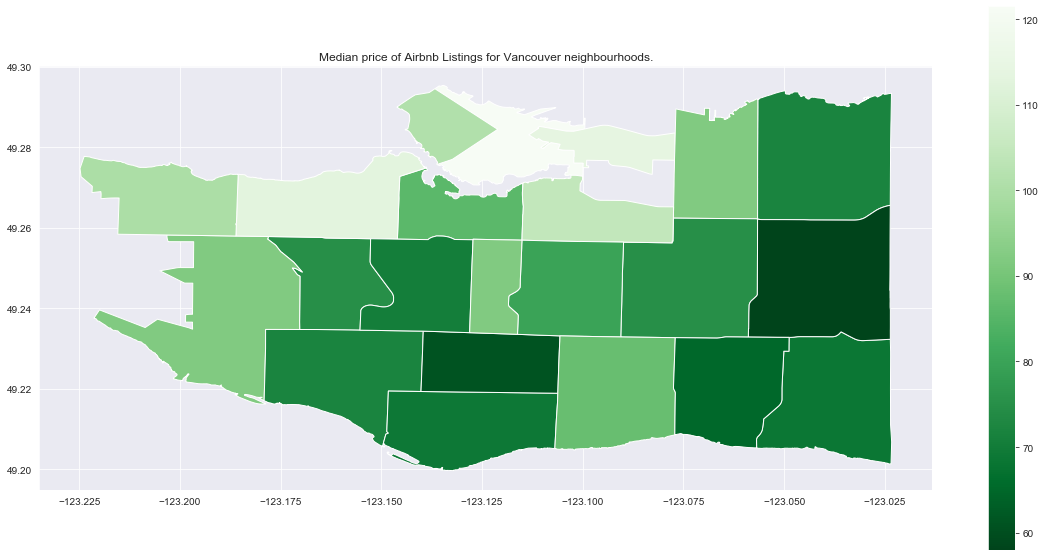

In [19]:
title = 'Median price of Airbnb Listings for Vancouver neighbourhoods.'
city_nb_plot(city_nb_price_gdf.loc['vancouver'], 'price_median', 
             cmap='Greens_r', title=title)

All cities seem to show higher prices in some neighbourhoods downtown, and lower prices in neighourhoods which are further away (which is not too suprising).

We want to be careful however in drawing conclusions here -- it's important to look see if any neighbourhoods have a small number of listings which might make inference problematic (small sample size).

In [20]:
# neighbourhoods with less than 10 listings
city_nb_price_gdf.query('num_listings < 10')['num_listings']

city      neighbourhood      
portland  Argay                  5.0
          Arlington Heights      7.0
          Arnold Creek           5.0
          Collins View           7.0
          Crestwood              3.0
          East Columbia          3.0
          Far Southwest          6.0
          Forest Park            3.0
          Glenfair               3.0
          Hayden Island          4.0
          Hollywood              5.0
          Linnton                3.0
          Lloyd District         6.0
          Maplewood              8.0
          Markham                3.0
          Marshall Park          4.0
          Northwest Heights      7.0
          Pleasant Valley        7.0
          Russell                2.0
          Sumner                 6.0
          Sunderland             3.0
          Sylvan-Highlands       7.0
          Woodland Park          1.0
seattle   Harbor Island          1.0
          Holly Park             8.0
          Industrial District    2.0
        

Now focusing on neighbourhoods with more than 10 listings, we'll plot the median price so we can look at rankings.

In [21]:
def city_nb_cat_plot(city_nb_gdf, col, kind, figsize, fontsize, title='', 
                     err_col=''):
    
    fig, axs = plt.subplots(nrows=3, ncols=1, figsize=figsize)
    
    for (i, city_name) in enumerate(['portland', 'seattle', 'vancouver']):

        # inputs for bar plot if error column is passed
        if err_col:
            df = city_nb_gdf.loc[city_name][[col, err_col]]\
                 .sort_values(by=col, ascending=False).reset_index()
            x=df['neighbourhood']
            y=df[col]
            yerr = df[err_col]
            axs[i].errorbar(x, y, yerr=yerr, ecolor=sns.color_palette()[i])
        # inputs for point plot
        else:
            df = city_nb_gdf.loc[city_name][col]\
                 .sort_values(ascending=False).reset_index()
            x=df['neighbourhood']
            y=df[col]
        # bar plot
        if kind=='bar':
            sns.barplot(x=x, y=y,
                        ax=axs[i], label=city_name, 
                        color=sns.color_palette()[i])
        # point plot
        if kind=='point':
            sns.pointplot(x=x, y=y,
                          ax=axs[i], label=city_name, 
                          color=sns.color_palette()[i])

        axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)
        leg = axs[i].legend([city_name], loc='upper right', fontsize=fontsize)
        leg.legendHandles[0].set_color(sns.color_palette()[i])

    fig.tight_layout()
    axs[0].set_title(title, fontsize=fontsize)

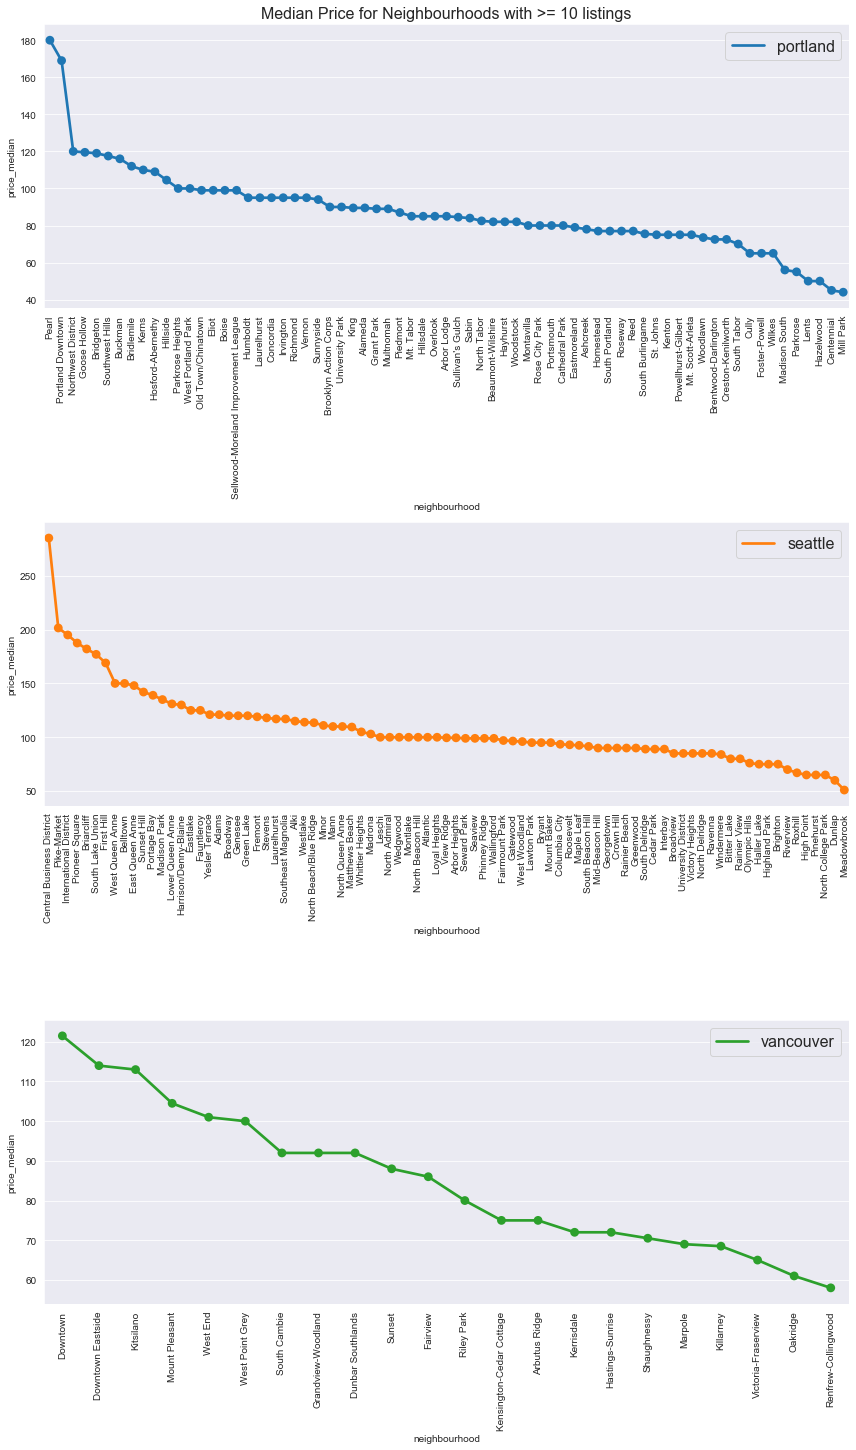

In [22]:
city_nb_high_price_gdf = city_nb_price_gdf.query('num_listings >= 10')
title='Median Price for Neighbourhoods with >= 10 listings'
city_nb_cat_plot(city_nb_high_price_gdf, col='price_median',
                 kind='point', figsize=(12, 20), fontsize=16, title=title)

As observed in the map plots above, in all three cities downtown neighbourhoods were the most expensive. Here are the top and bottom 5 neighbourhood median prices by city.

In [23]:
# top 5 most expensive neighourhoods by city (with more than 10 reviews)
top_5_nb_price_df = city_nb_high_price_gdf.groupby('city')['price_median'].nlargest(5).droplevel(0)
top_5_nb_price_df

city       neighbourhood            
portland   Pearl                        180.0
           Portland Downtown            169.0
           Northwest District           120.0
           Goose Hollow                 119.5
           Bridgeton                    119.0
seattle    Central Business District    285.0
           Pike-Market                  201.5
           International District       195.0
           Pioneer Square               187.5
           Briarcliff                   182.0
vancouver  Downtown                     121.5
           Downtown Eastside            114.0
           Kitsilano                    113.0
           Mount Pleasant               104.5
           West End                     101.0
Name: price_median, dtype: float64

In [24]:
# top 5 least expensive neighourhoods by city (with more than 10 reviews)
bot_5_nb_price_df = city_nb_high_price_gdf.groupby('city')['price_median'].nsmallest(5).droplevel(0)
bot_5_nb_price_df

city       neighbourhood      
portland   Mill Park              44.0
           Centennial             45.0
           Hazelwood              50.0
           Lents                  50.0
           Parkrose               55.0
seattle    Meadowbrook            51.0
           Dunlap                 60.0
           High Point             65.0
           North College Park     65.0
           Pinehurst              65.0
vancouver  Renfrew-Collingwood    58.0
           Oakridge               61.0
           Victoria-Fraserview    65.0
           Killarney              68.5
           Marpole                69.0
Name: price_median, dtype: float64

### Conclusions

We found that Portland has the least expensive listings while Seattle has the most expensive. As of November 2019, the median prices of listings (in USD) were Portland $\$90$, Vancouver $\$95$, Seattle $\$115$. We also found the 5 most and least expensive neighbourhoods for each city

## How does listing price change over time?

The listing prices in `listings` dataset represent the listing prices as of February 2019 when the data was gathered. To consider how prices change over time, we'll need to look at the `calendar` dataset. It's important to note that these represent the price to book listings for dates *in the future* (namely through February 2021) and are thus both subject to frequent change and distinct from actual (historical) prices paid for listings.

### What trends in price can we identify across all three cities?

Let's look at yearly price trends. We'll use mean instead of median here because it's a bit smoother (perhaps because it's less affected by listings going on and off the market, i.e. overall fluctations in availability).  

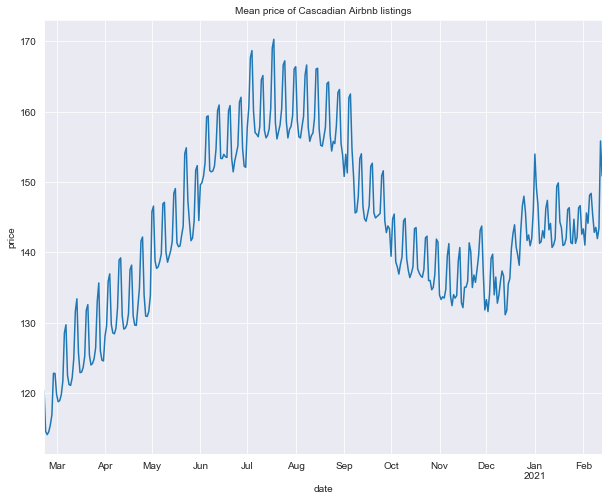

In [25]:
def calendar_line_plot(calendar_df, col, agg_func, title='', by_city=False,
                       rolling=None, figsize=(10, 8), fontsize=10, **kwargs):
    """Plot line plot of aggregate function of price."""
    fig, ax = plt.subplots(1, 1, figsize=figsize)
    df = calendar_df.groupby('date').agg(agg_func)
    if rolling:
        df[col].rolling(rolling).mean().plot(**kwargs)
    else:
        df[col].plot(**kwargs)
    plt.ylabel(col, fontsize=fontsize)
    ax.set_title(title, fontsize=fontsize)
    
title = 'Mean price of Cascadian Airbnb listings'
calendar_line_plot(calendar_df, 'price', agg_func='mean', title=title)

There is a clear short-term weekly trend, as well as a seasonal trend, neither of which is perhaps suprising. There are likely a number of factors influencing weekly demand fluctuations (for example increased influx of tourists) but understanding them is difficult given the data were working with.

Let's look at a 14-day moving average to isolate the seasonal trend.

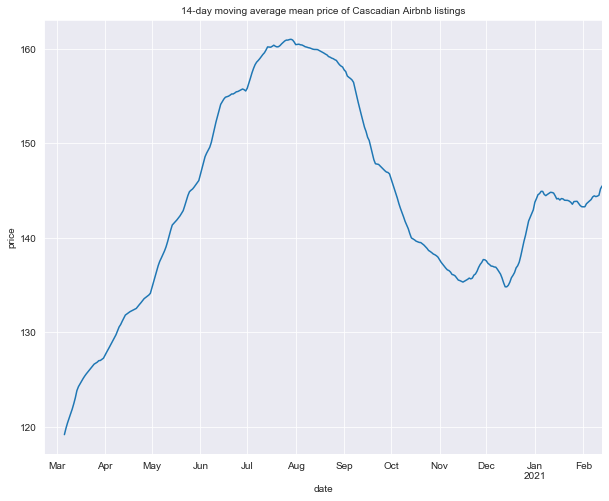

In [26]:
title = '14-day moving average mean price of Cascadian Airbnb listings'
calendar_line_plot(calendar_df, 'price', agg_func='mean', 
                   title=title, rolling=14)

There's a clear trough around the winter holidays in 2021 followed by a plateau in January and February which is difficult to interpret. Minimum price is in March 2019, with maximum price reached in summer around the end of July and early August,  hypothetically caused by summer travel. 

Let's look at a plot of proportion of available listings, again taking a 14-day moving average to smooth out weekly fluctuations.

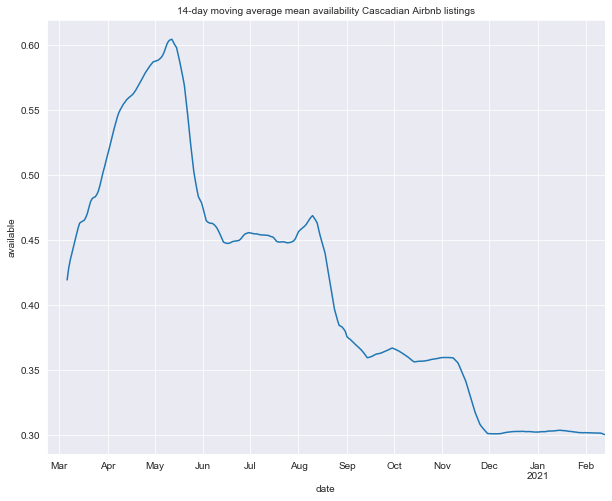

In [29]:
title = '14-day moving average mean availability Cascadian Airbnb listings'
calendar_line_plot(calendar_df, 'available', agg_func='mean',
                   title=title, rolling=14)

There doesn't seem to be any obvious relationship here between availability and price, although the year-long low in availability in January and February might have some relationship to the increase in price then.

### What trends in price can we identify within cities?

Let's a look at whether these trends are similar across all three cities.

In [30]:
def city_ma_plot(calendar_df, col, agg_func,
                 rolling=None, figsize=(10, 8), title=''):
    plt.figure(figsize=figsize)
    df = calendar_df.groupby(['city', 'date']).agg(agg_func)
    if rolling:
        df[col + '_7d_ma'] = df.rolling(rolling).agg(agg_func)[col]
        df = df.reset_index()
        sns.lineplot(x='date', y=col + '_7d_ma', data=df, hue='city')
    else:
        df = df.reset_index()
        sns.lineplot(x='date', y=col, data=df, hue='city')
    plt.title(title)

First we'll look at mean prices across cities

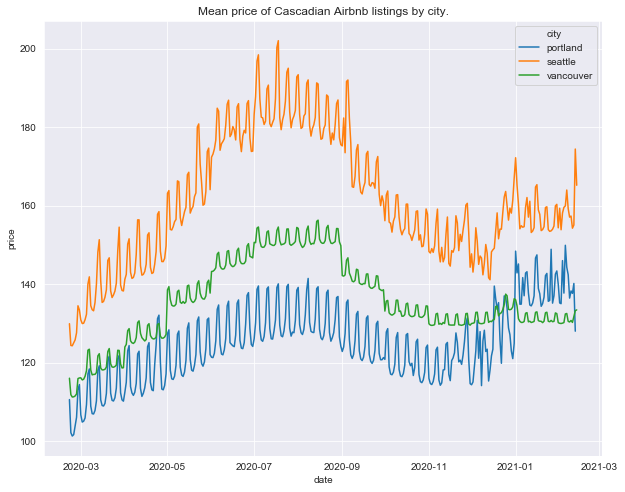

In [31]:
title = 'Mean price of Cascadian Airbnb listings by city.'
city_ma_plot(calendar_df, 'price', agg_func='mean', title=title)

The price ranking we discovered [above](#How-do-listing-prices-vary-across-the-cities?) (Portland < Vancouver < Seattle) is evident here. 

The plots of median price by city show similar patterns to overall median -- weekly price fluctuations and a steady increase reaching a maximum in late summer but there are some clear differences. The weekly price trend is much less pronounced in Vancouver than Seattle and Portland, while the summer price trend is much more pronounced in Seattle than Vancouver or Portland.

We note that Seattle and Portland prices both show the January-February 2021 increase we saw overall but Vancouver price does not.

Let's look at 14-day moving average prices and availability

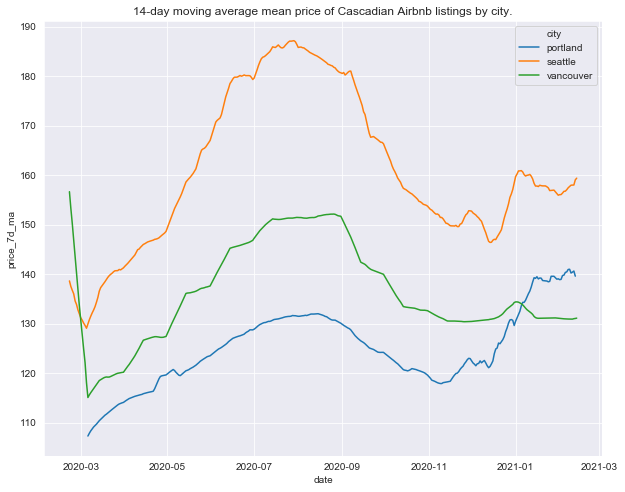

In [32]:
title = '14-day moving average mean price of Cascadian Airbnb listings by city.'
city_ma_plot(calendar_df, 'price', agg_func='mean', rolling=14, title=title)

All three cities show the summer seasonal trends in price we identified above, although the summer trend is most pronounced in Seattle. The January-February 2021 price increase is most pronounced in Portland in fact at its peak it exceeds peak summer price by around $\$10$ ($\approx 8\%$). During this time, Portland prices exceed Vancouver's.

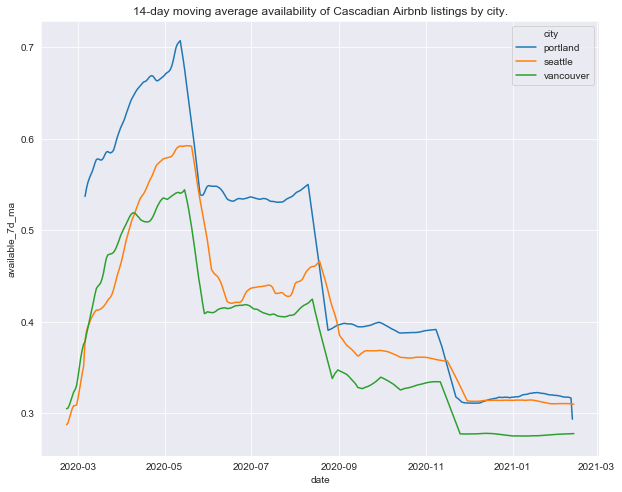

In [33]:
title = '14-day moving average availability of Cascadian Airbnb listings by city.'
city_ma_plot(calendar_df, 'available', agg_func='mean', rolling=14, title=title)

Availability trends are all remarkably similar across all three cities.

### Conclusions

The prices of listings in all three cities were lowest in March, and increasing throughout the year, peaking late summer. Relative to prices at other times of the year, this late summer increase is greatest for Seattle. Both Seattle and Portland see price increases in January and February of 2021, with Portlands price increase most pronounced (around 8% above peak summer prices).

Late summer is the most expensive time of year to visit all three cities (not suprising since it's usual the longest stretch of warm dry weather in a region known for cold and wet), but since this seasonal price increase is much more pronounced for Seattle. If you want to visit the Pacific Northwest during late summer Vancouver and Portland look like more affordable options.

## How does overall guest satisfaction relate to location?

Now we'll take a look at how guest satisfaction relates to location. We'll use overall ratings of listings as a measure of guest satisfaction (`review_scores_rating`). The analysis will be very similar to what we did for price [above](#Price)

Let's inspect overall ratings a little more carefully

In [42]:
listings_df['review_scores_rating'].describe()

count    15979.000000
mean        95.574254
std          6.722625
min         20.000000
25%         94.000000
50%         98.000000
75%         99.000000
max        100.000000
Name: review_scores_rating, dtype: float64

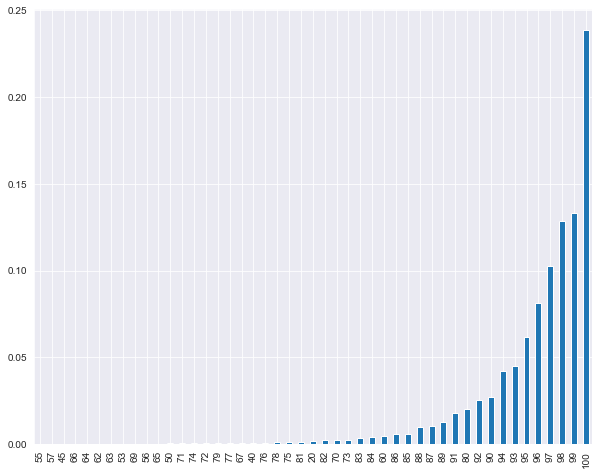

In [43]:
plt.figure(figsize=(10, 8))
(listings_df['review_scores_rating'].value_counts()/listings_df.shape[0])\
.sort_values().plot(kind='bar');

Again an extremely skewed distribution, highly concentrated in high rating values. 

Since the value of `review_scores_rating` is an integer between 0 and 100, this variable presents an interesting modeling challenge (see [below](#Predicting-overall-guest-satisfaction)). Thought of as a continuous variable, a reasonable parametric model for this variable might be the [beta](https://en.wikipedia.org/wiki/Beta_distribution) distribution (or, for 100 - `review_scores_rating`, a [bounded Pareto](https://en.wikipedia.org/wiki/Pareto_distribution#Bounded_Pareto_distribution) distribution). 

A more appropriate model might be some thing along the lines of [ordered logistic regression](https://en.wikipedia.org/wiki/Ordered_logit), that is a latent 
variable model

$$Y = i,  0 \leqslant i \leqslant 100$$

iff 

$$Y^* \in [i, i+1)$$

where $Y$ is `review_scores_ratings` and $Y*$ is a latent continuous variable (perhaps beta or bounded Pareto distributed). This is an interesting area for further exploration, but we're not going to go into it here. Later we'll be focusing on [prediction](#Modeling-response) and hence the conditional variable $Y| \mathbf{X} = \mathbf{x}$

### How does guest satisfaction compare across each of the three cities?

First we'd like to look at differences in listing prices between cities.

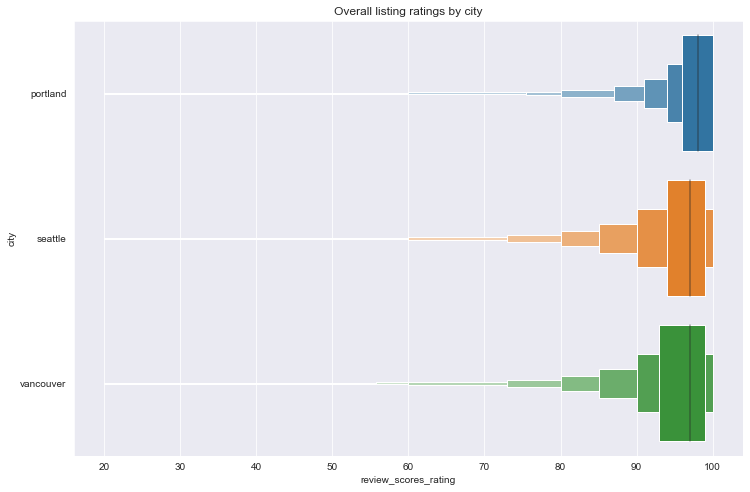

In [45]:
# boxen plots of ratings by city 
plt.figure(figsize=(12, 8))
df = listings_df.reset_index(level=0).sort_values(by='city')
sns.boxenplot(y=df['city'], x=df['review_scores_rating'], orient='h')
plt.title('Overall listing ratings by city');

The distributions appear quite similar. Unfortunately, standard Box-Cox transformations are of little use in spreading out the distribution for easier visual comparison.

Let's look at summary statistics. As with price, we'll use median for central tendency and median absolute deviation for spread.

In [46]:
# summary statistics of review_scores_rating
summary_df = listings_df.groupby(['city'])['review_scores_rating'].describe()
summary_df = summary_df.drop(columns=['mean', 'std'])
summary_df['median'] = listings_df.groupby(['city'])['review_scores_rating'].median()
summary_df['mad'] = \
    listings_df.groupby(['city'])['review_scores_rating'].agg(ss.median_absolute_deviation)
summary_df.sort_values(by='median')

,count,min,25%,50%,75%,max,median,mad
city,,,,,,,,
seattle,6530.0,20.0,94.0,97.0,99.0,100.0,97,2.9652
vancouver,5320.0,20.0,93.0,97.0,99.0,100.0,97,4.4478
portland,4129.0,20.0,96.0,98.0,100.0,100.0,98,2.9652


While these numbers are very close, there are slight differences. Seattle and Vancouver have the same median rating of 97, and very similar distributions, while Portland has a higher median rating of 98. Seattle and Portland have comparable mads while Vancouver has a higher mad, indicating a wider spread.

### Which neighborhoods have the highest and lowest guest satisfaction?

In [47]:
city_nb_ratings_gdf = get_city_nb_gdf(listings_df, ['review_scores_rating'], 
                                    num_reviews=True)
city_nb_ratings_gdf.head()

geometry  \
city     neighbourhood                                                          
portland Alameda            MULTIPOLYGON Z (((-122.64194 45.55542 0.00000,...   
         Arbor Lodge        MULTIPOLYGON Z (((-122.67858 45.57721 0.00000,...   
         Argay              MULTIPOLYGON Z (((-122.51026 45.56615 0.00000,...   
         Arlington Heights  MULTIPOLYGON Z (((-122.70194 45.52415 0.00000,...   
         Arnold Creek       MULTIPOLYGON Z (((-122.69870 45.43255 0.00000,...   

                            review_scores_rating_median  \
city     neighbourhood                                    
portland Alameda                                   99.0   
         Arbor Lodge                               98.0   
         Argay                                     99.0   
         Arlington Heights                         99.0   
         Arnold Creek                              99.0   

                            review_scores_rating_mad  num_reviews  
city     neighbourhood                                             
portland Alameda                              1.4826         24.0  
         Arbor Lodge                          1.4826         71.0  
         Argay                                1.4826          5.0  
         Arlington Heights                    1.4826          7.0  
         Arnold Creek                         1.4826          5.0

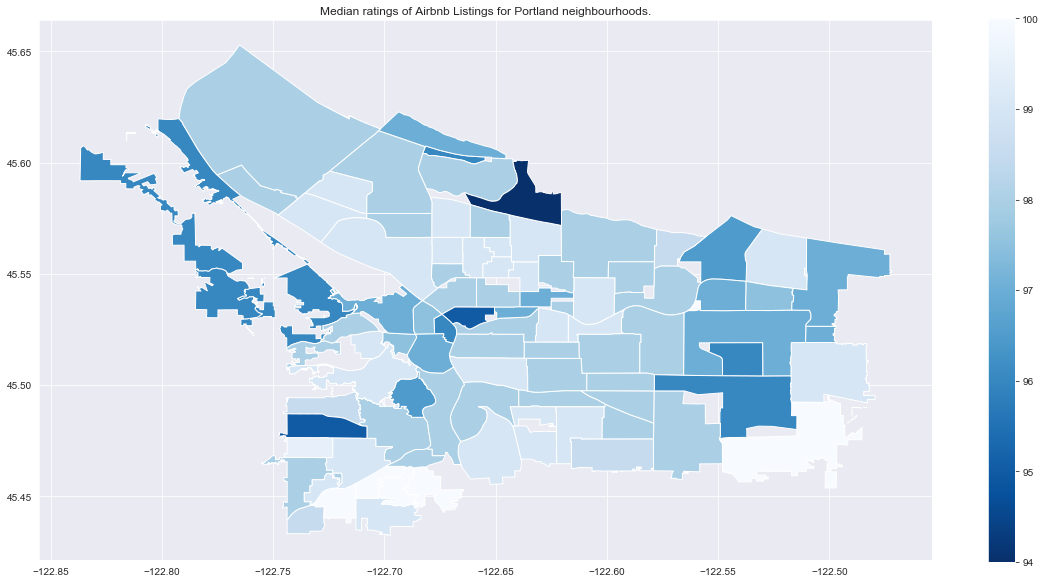

In [48]:
title = 'Median ratings of Airbnb Listings for Portland neighbourhoods.'
city_nb_plot(city_nb_ratings_gdf.loc['portland'], 'review_scores_rating_median', 
             cmap='Blues_r', title=title)

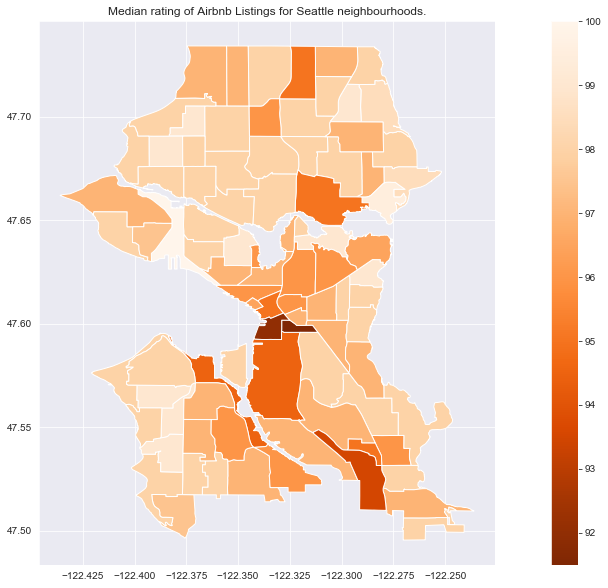

In [49]:
title = 'Median rating of Airbnb Listings for Seattle neighbourhoods.'
city_nb_plot(city_nb_ratings_gdf.loc['seattle'], 'review_scores_rating_median', 
             cmap='Oranges_r', title=title)

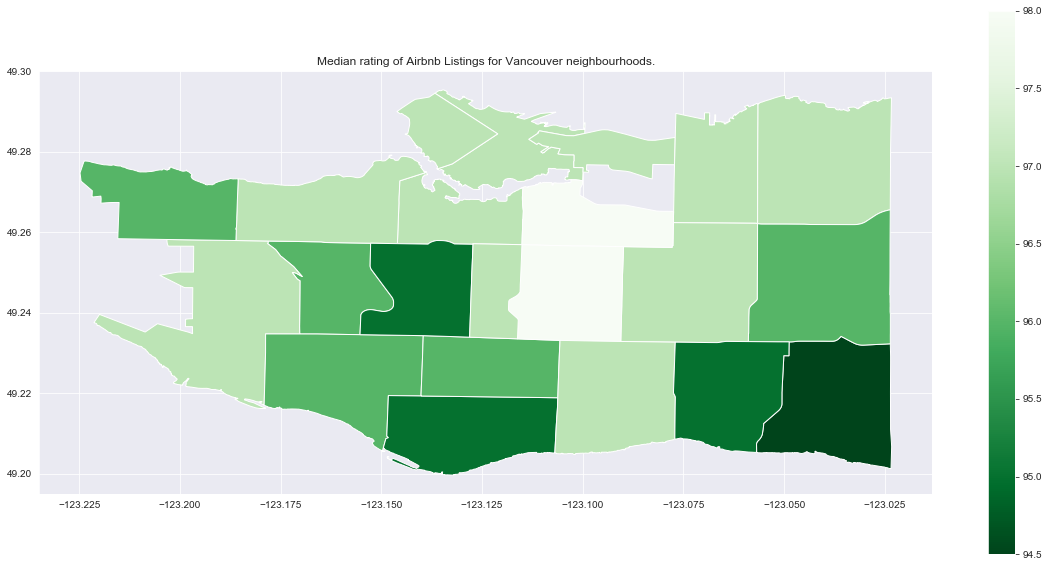

In [50]:
title = 'Median rating of Airbnb Listings for Vancouver neighbourhoods.'
city_nb_plot(city_nb_ratings_gdf.loc['vancouver'], 'review_scores_rating_median', 
             cmap='Greens_r', title=title)

Compared to price, ratings don't have as clear of a relationship to proximity to downtown. As with price, we want to be careful of neighbourhoods with small numbers of reviews. Now focusing on neighbourhoods with more than 10 reviews, we'll plot the median rating so we can look at rankings.

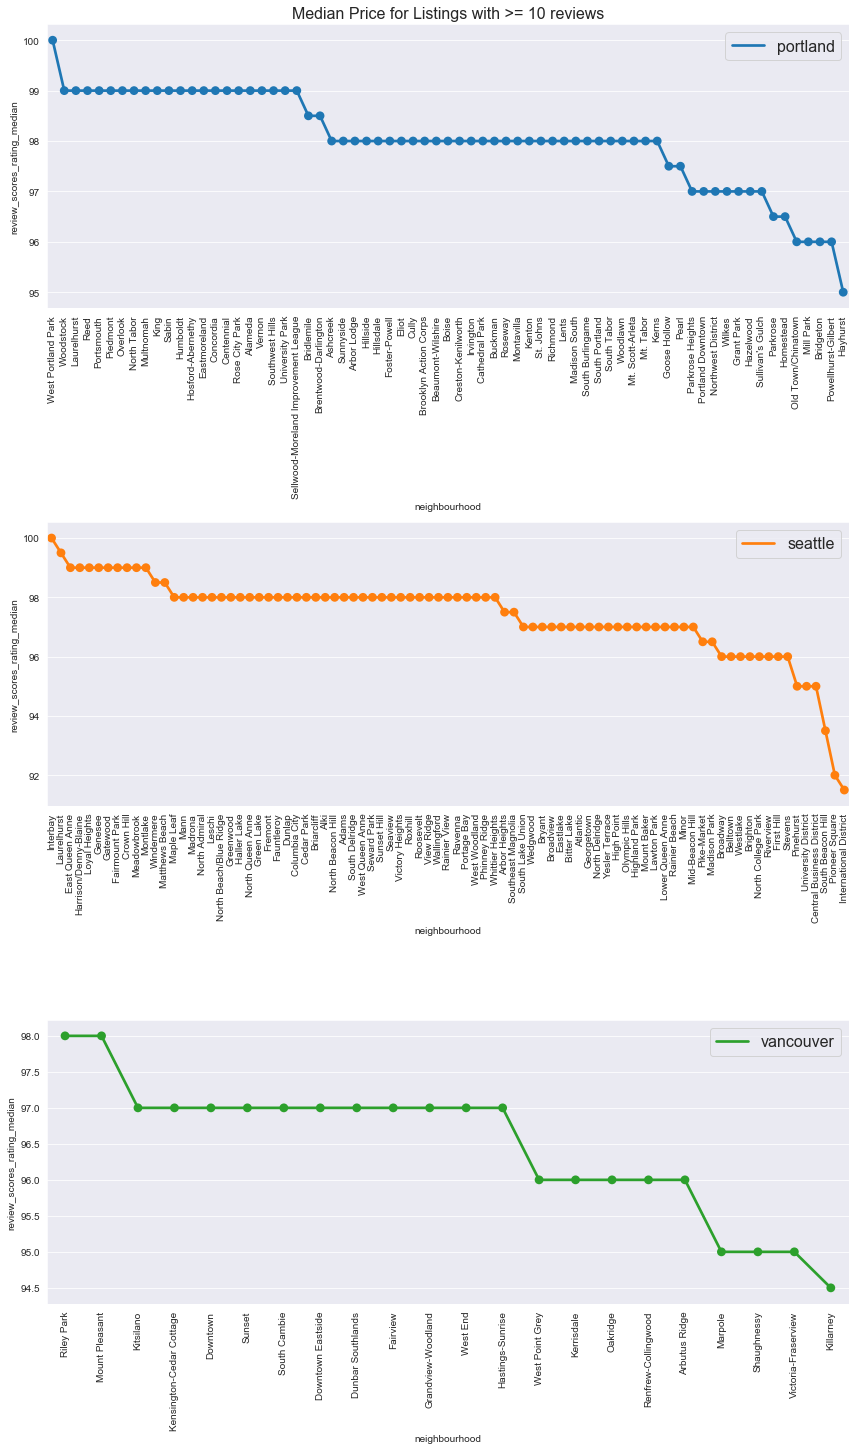

In [51]:
city_nb_high_ratings_gdf = city_nb_ratings_gdf.query('num_reviews >= 10')
title='Median Price for Listings with >= 10 reviews'
city_nb_cat_plot(city_nb_high_ratings_gdf, col='review_scores_rating_median',
                 kind='point', figsize=(12, 20), fontsize=16, title=title)

Here are the top and bottom 5 neighbourhoods by median ratings and city.

In [52]:
# top 5 most expensive neighourhoods by city (with more than 10 reviews)
city_nb_high_ratings_gdf.groupby('city')['review_scores_rating_median']\
.nlargest(5).droplevel(0)

city       neighbourhood     
portland   West Portland Park    100.0
           Alameda                99.0
           Centennial             99.0
           Concordia              99.0
           Eastmoreland           99.0
seattle    Interbay              100.0
           Laurelhurst            99.5
           Crown Hill             99.0
           East Queen Anne        99.0
           Fairmount Park         99.0
vancouver  Mount Pleasant         98.0
           Riley Park             98.0
           Downtown               97.0
           Downtown Eastside      97.0
           Dunbar Southlands      97.0
Name: review_scores_rating_median, dtype: float64

In [53]:
# top 5 least expensive neighourhoods by city (with more than 10 reviews)
city_nb_high_ratings_gdf.groupby('city')['review_scores_rating_median']\
.nsmallest(5).droplevel(0)

city       neighbourhood            
portland   Hayhurst                     95.0
           Bridgeton                    96.0
           Mill Park                    96.0
           Old Town/Chinatown           96.0
           Powellhurst-Gilbert          96.0
seattle    International District       91.5
           Pioneer Square               92.0
           South Beacon Hill            93.5
           Central Business District    95.0
           Pinehurst                    95.0
vancouver  Killarney                    94.5
           Marpole                      95.0
           Shaughnessy                  95.0
           Victoria-Fraserview          95.0
           Arbutus Ridge                96.0
Name: review_scores_rating_median, dtype: float64

### How does the price of listings in a neighbourhood relate to guest satisfaction?

Let's look at a scatterplot of neighbourhood median price versus median rating.

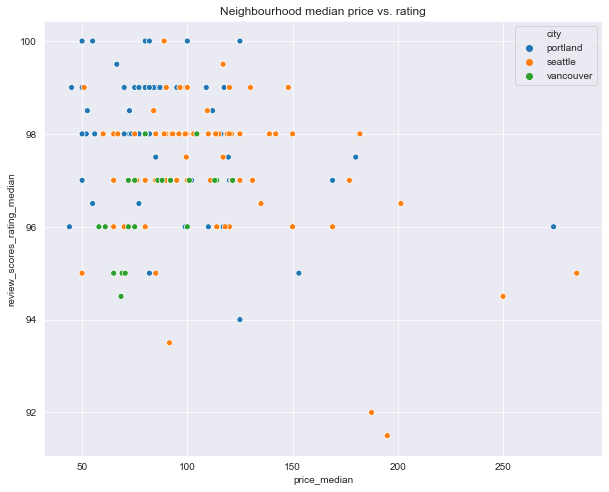

In [56]:
plt.figure(figsize=(10, 8))
df = pd.concat([city_nb_price_gdf['price_median'], 
                city_nb_ratings_gdf['review_scores_rating_median']], axis=1).reset_index()
sns.scatterplot(x='price_median', y='review_scores_rating_median', hue='city', data=df)
plt.title('Neighbourhood median price vs. rating');

It's hard to discern but the Seattle and Portland data seem to indicate a negative relationship between price and ratings, while Vancouver data indicates a positive relationship. To investigate this further, we'll test two hypotheses. 

The first (alternative) hypothesis is that there's a linear relationship between neighbourhood median price and median rating - the test statistic is Pearson's correlation coefficient. The first null hypothesis is that there's no linear relationship between neighbourhood median price and median rating - the test statistic is Pearson's correlation coefficient. 

The second null hypothesis is that there's no [rank correlation](https://en.wikipedia.org/wiki/Rank_correlation) - the test statistic we'll use [Spearman's r](https://en.wikipedia.org/wiki/Spearman%27s_rank_correlation_coefficient). This test has the advantage of being non-parametric, and detecting more general (non-linear) monotonic relationships. We'll test the null hypothesis that price and rating have no monotic relationship.

In [115]:
def get_hyp_test_df(arr1, arr2, index_label='overall'):
    """Dataframe of row of hypothesis tests."""
    hyp_test_df = pd.DataFrame(columns=['rho', 'p_rho', 'r', 'p_r'], index=[index_label])
    rho, p_rho = ss.pearsonr(arr1, arr2)
    tau, p_tau = ss.spearmanr(arr1, arr2)
    hyp_test_df.loc[index_label, 'rho'] = rho
    hyp_test_df.loc[index_label, 'p_rho'] = p_rho
    hyp_test_df.loc[index_label, 'r'] = tau
    hyp_test_df.loc[index_label, 'p_r'] = p_tau
    return hyp_test_df

def price_median_hyp_tests(city_nb_price_gdf):
    """Dataframe of hypothesis tests overalll and by city."""
    results = pd.DataFrame(columns=['rho', 'p_rho', 'r', 'p_r'])
    
    for index_label in ['overall', 'portland', 'vancouver', 'seattle']:
        if index_label == 'overall':
            hyp_test_df = get_hyp_test_df(city_nb_price_gdf['price_median'].dropna().values, 
                                          city_nb_ratings_gdf['review_scores_rating_median'].dropna().values,
                                          index_label)
            results = results.append(hyp_test_df)
        else:
            hyp_test_df = get_hyp_test_df(city_nb_price_gdf.loc[index_label]['price_median'].dropna().values, 
                                          city_nb_ratings_gdf.loc[index_label]['review_scores_rating_median'].dropna().values,
                                          index_label)
            results = results.append(hyp_test_df)
   
    return results

In [116]:
# hypothesis tests for neighourhood median price and rating
price_median_hyp_tests(city_nb_price_gdf)

,rho,p_rho,r,p_r
overall,-0.350468,1.96933e-07,-0.117418,0.0904213
portland,-0.273757,0.00726562,-0.137252,0.184726
vancouver,0.588672,0.00394961,0.683055,0.000459185
seattle,-0.450522,6.59678e-06,-0.127465,0.225959


For the tests for linear relationships, the sample pearson's correlation indicates a weak negative relationship overall and for Portland, a moderately negative relationship for Seattle, and stronger positive relationship for Vancouver. The p-values for Portland and Vancouver are relatively high compared to Seattle however, and it's clear the Seattle data had an outsize effect on the overall. 

For the second test for more general monotic relationships, the sample spearman's correlation indicates relationships in the same direction - negative overall and for Portland and Seattle, while positive for Vancouver. Here the p-values overall are quite high overall and for Portland and Seattle, high enough that the results aren't significant and we won't reject the null. The p-value for Vancouver is low enough to be significant however, in this case we will reject the null.

The results of the second test appear to be in conflict with the first, at least after hypothesis are accepted or rejected. Taking a more nuanced view, we'll say there's weak evidence of a negative relationship between price and rating overall and in Portland and Seattle, while there's strong evidence of a positive relationship between price and rating in Vancouver.

### Conclusions

We found that Portland has the highest listings ratings. As of November 2019, the median ratings of listings were Portland 98, Vancouver 97, and Seattle 97. We also found the 5 highest and lowest rated neighbourhoods for each city. 

We found weak evidence of a negative relationship between price and rating overall, and in Portland and Seattle, with Seattle showing the stronger relationship. We found strong evidence of a positive relationship between price and rating in Vancouver.

## What are the most important listing features affecting guest satisfaction?

Now we're interested in understanding how listing features relate to guest satisfaction, again using overll ratings as a measure of guest satisfaction. 

We'll treat this as a supervised learning problem with `review_scores_rating` as the response variable. We will also try to predict the response, although our main purpose is to get a sense of which features are most important in their relationship to guest satisfaction, rather than optimizing prediction accuracy.

### Getting features

Before we try to predict the overall rating response variable, we need to select features and inspect them and their relationship to the response. We'll create a new dataframe with the features we want to focus on. We'll also create a variable representing how long each host has been hosting.

Note that among other features, we are dropping `host_is_superhost`. Superhosts [by definition](https://www.airbnb.com/help/article/829/how-do-i-become-a-superhost) have high overall ratings, so the presence of this feature has an outsize effect on the response (experiments not included here confirmed this).

In [131]:
def create_ratings_df(listings):
    # create a new variable representing how long each host has been a host
    listings['days_hosting'] = 0
    
    listings.loc['seattle', 'days_hosting'] = (datetime.datetime(2020, 2, 22)\
                                              - listings.loc['seattle']['host_since']).dt.days.values
    listings.loc['portland', 'days_hosting'] = (datetime.datetime(2020, 2, 13)\
                                               - listings.loc['portland']['host_since']).dt.days.values
    listings.loc['vancouver', 'days_hosting'] = (datetime.datetime(2022, 2, 16)\
                                                - listings.loc['vancouver']['host_since']).dt.days.values
    listings['days_hosting'] = listings['days_hosting'].astype('int64')
    
    # drop irrelevant columns 
    drop_cols = ['id', 'host_id', 'host_identity_verified', 'host_since',
                 'latitude', 'longitude', 'requires_license', 
                 'neighbourhood_cleansed', 'host_is_superhost',
                 'maximum_nights', 'minimum_nights']
    drop_cols += [col for col in listings.columns if 'calculated' in col]
    drop_cols += [col for col in listings.columns if 'calculated' in col or 
                  'availability' in col]
    drop_cols += [col for col in listings.columns if 'review_score' in col]
    drop_cols.remove('review_scores_rating')
    ratings_df = listings.drop(columns=drop_cols)
    return ratings_df

ratings_df = create_ratings_df(listings_df)

We'll spend a little time getting to know these features.

### Exploring features

In [132]:
# get quantitative and categorical column names
quant_cols = ratings_df.columns[(ratings_df.dtypes == 'int64') | 
                                      (ratings_df.dtypes == 'float64')]
cat_cols = ratings_df.columns[(ratings_df.dtypes == 'bool') | 
                                  (ratings_df.dtypes == 'category')]

In [133]:
ratings_df[quant_cols].info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 15979 entries, ('seattle', 0) to ('vancouver', 6174)
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   accommodates          15979 non-null  int64  
 1   bathrooms             15979 non-null  float64
 2   bedrooms              15979 non-null  int64  
 3   beds                  15979 non-null  int64  
 4   cleaning_fee          15979 non-null  float64
 5   extra_people          15979 non-null  float64
 6   guests_included       15979 non-null  int64  
 7   host_acceptance_rate  15979 non-null  float64
 8   host_response_rate    15979 non-null  float64
 9   num_amenities         15979 non-null  int64  
 10  number_of_reviews     15979 non-null  int64  
 11  price                 15979 non-null  float64
 12  review_scores_rating  15979 non-null  int64  
 13  reviews_per_month     15979 non-null  float64
 14  security_deposit      15979 non-null  float

In [134]:
ratings_df[cat_cols].info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 15979 entries, ('seattle', 0) to ('vancouver', 6174)
Data columns (total 58 columns):
 #   Column                            Non-Null Count  Dtype   
---  ------                            --------------  -----   
 0   amen_24_hour_checkin              15979 non-null  bool    
 1   amen_air_conditioning             15979 non-null  bool    
 2   amen_bathtub                      15979 non-null  bool    
 3   amen_bbq_grill                    15979 non-null  bool    
 4   amen_bed_linens                   15979 non-null  bool    
 5   amen_cable_tv                     15979 non-null  bool    
 6   amen_carbon_monoxide_detector     15979 non-null  bool    
 7   amen_childrens_books_and_toys     15979 non-null  bool    
 8   amen_coffee_maker                 15979 non-null  bool    
 9   amen_cooking_basics               15979 non-null  bool    
 10  amen_dishes_and_silverware        15979 non-null  bool    
 11  amen_dishwasher            

In [135]:
def plot_dists(ratings_df, var_kind, cols, num_cols, num_rows, trans_dict=None, figsize=(8, 8),
               dist_plot_kws={}, count_plot_kws={}):

    ratings_df_cp = ratings_df.copy()
    
    if trans_dict:
        for col in trans_dict:
            try:
                ratings_df_cp.loc[:, col] = ratings_df_cp[col].apply(trans_dict[col])
            except:
                print(col)

    if var_kind == 'quants':

        fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=figsize)
        
        for (i, col) in enumerate(cols):
            ax = axs[i//num_cols, i%num_cols]
            sns.distplot(ratings_df_cp[col], kde=False, norm_hist=True,
                             ax=ax, **dist_plot_kws)
            
        
    if var_kind == 'cats':
        
        fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=figsize)
        
        for (i, col) in enumerate(cols):
            ax = axs[i//num_cols, i%num_cols]
            sns.countplot(ratings_df_cp[col], ax=ax, **count_plot_kws)
            ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    
    fig.tight_layout() 

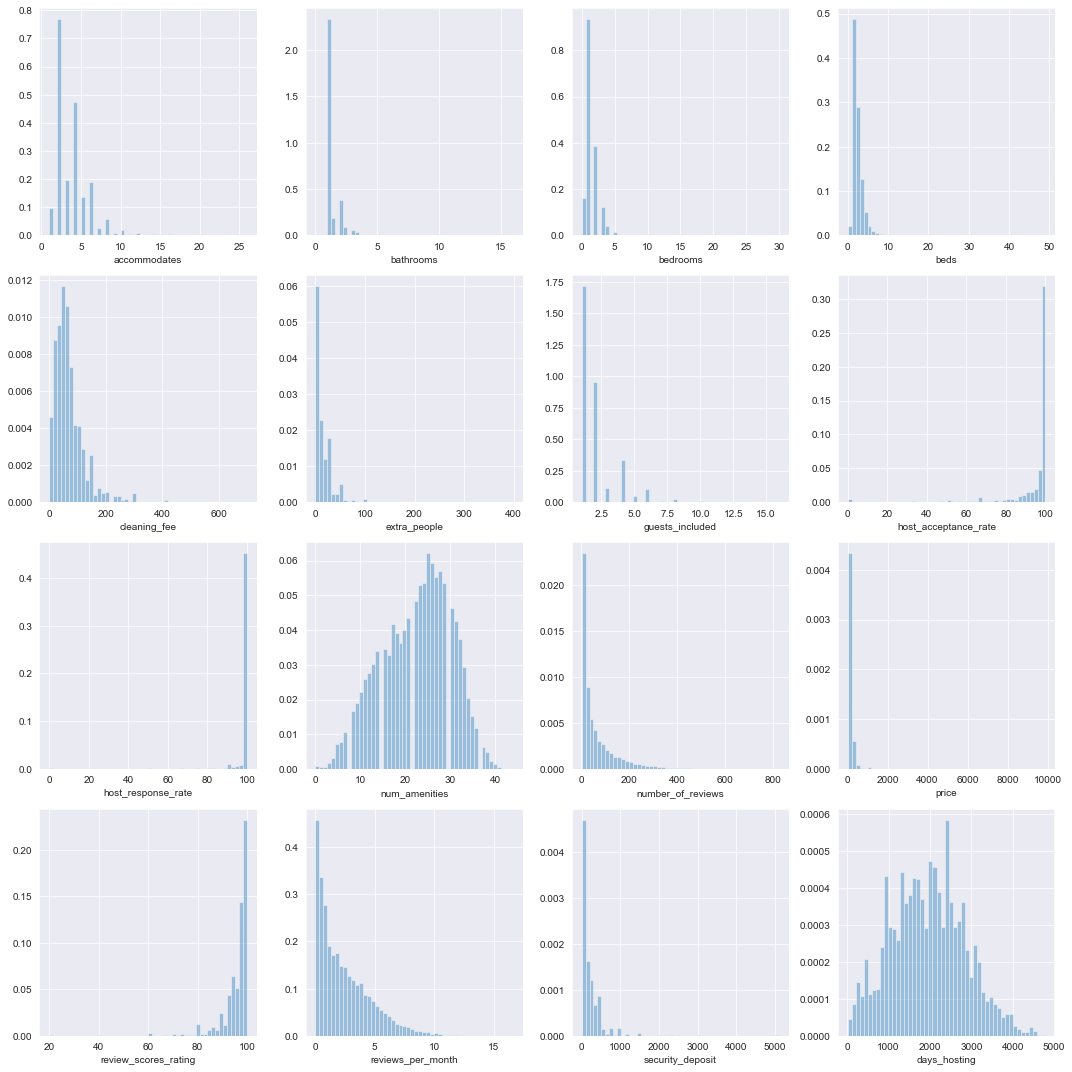

In [136]:
# plot of distributions of quantitative features
plot_dists(ratings_df, 'quants', quant_cols, num_rows=4, num_cols=4, figsize=(15, 15))

Most of these features are highly skewed and peaked, which could be problematic for prediction. Let's apply a few Box-cox transformations.

In [137]:
# minimum values for quantitative columns
ratings_df[quant_cols].min()

accommodates             1.00
bathrooms                0.00
bedrooms                 0.00
beds                     0.00
cleaning_fee             0.00
extra_people             0.00
guests_included          1.00
host_acceptance_rate     0.00
host_response_rate       0.00
num_amenities            0.00
number_of_reviews        1.00
price                   10.00
review_scores_rating    20.00
reviews_per_month        0.01
security_deposit         0.00
days_hosting            13.00
dtype: float64

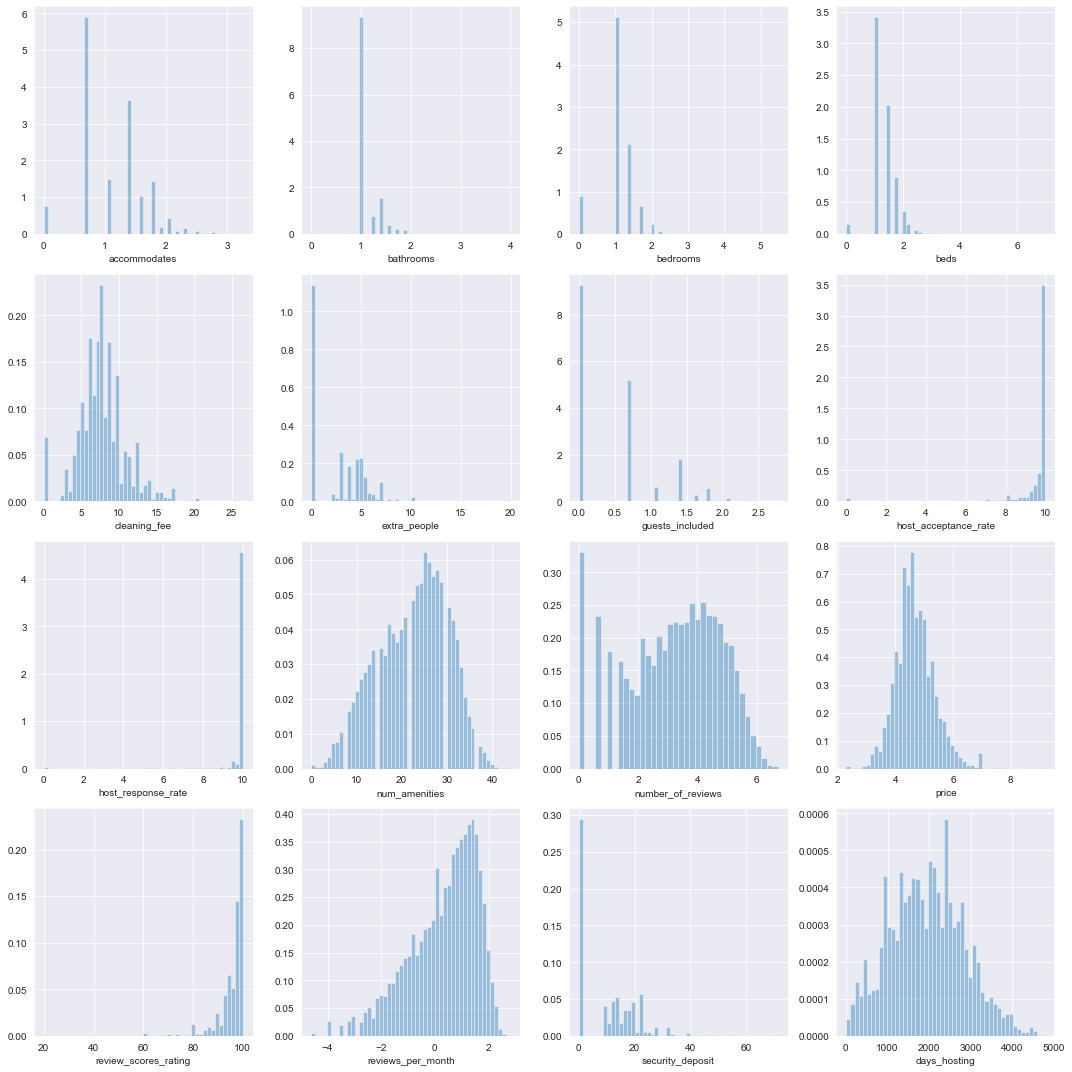

In [140]:
# plot of distributions of transformed quantitative features
log_dict = {col: np.log for col in ['accommodates', 'guests_included',
                                    'number_of_reviews', 'price',
                                    'reviews_per_month']}
sqrt_dict = {col: np.sqrt for col in ['bathrooms', 'bedrooms',
                                      'beds', 'cleaning_fee',
                                      'extra_people', 'host_response_rate',
                                      'host_acceptance_rate',
                                      'security_deposit']}
trans_dict = {**log_dict, **sqrt_dict}
plot_dists(ratings_df, 'quants', quant_cols, trans_dict=trans_dict, 
           num_rows=4, num_cols=4, figsize=(15, 15))

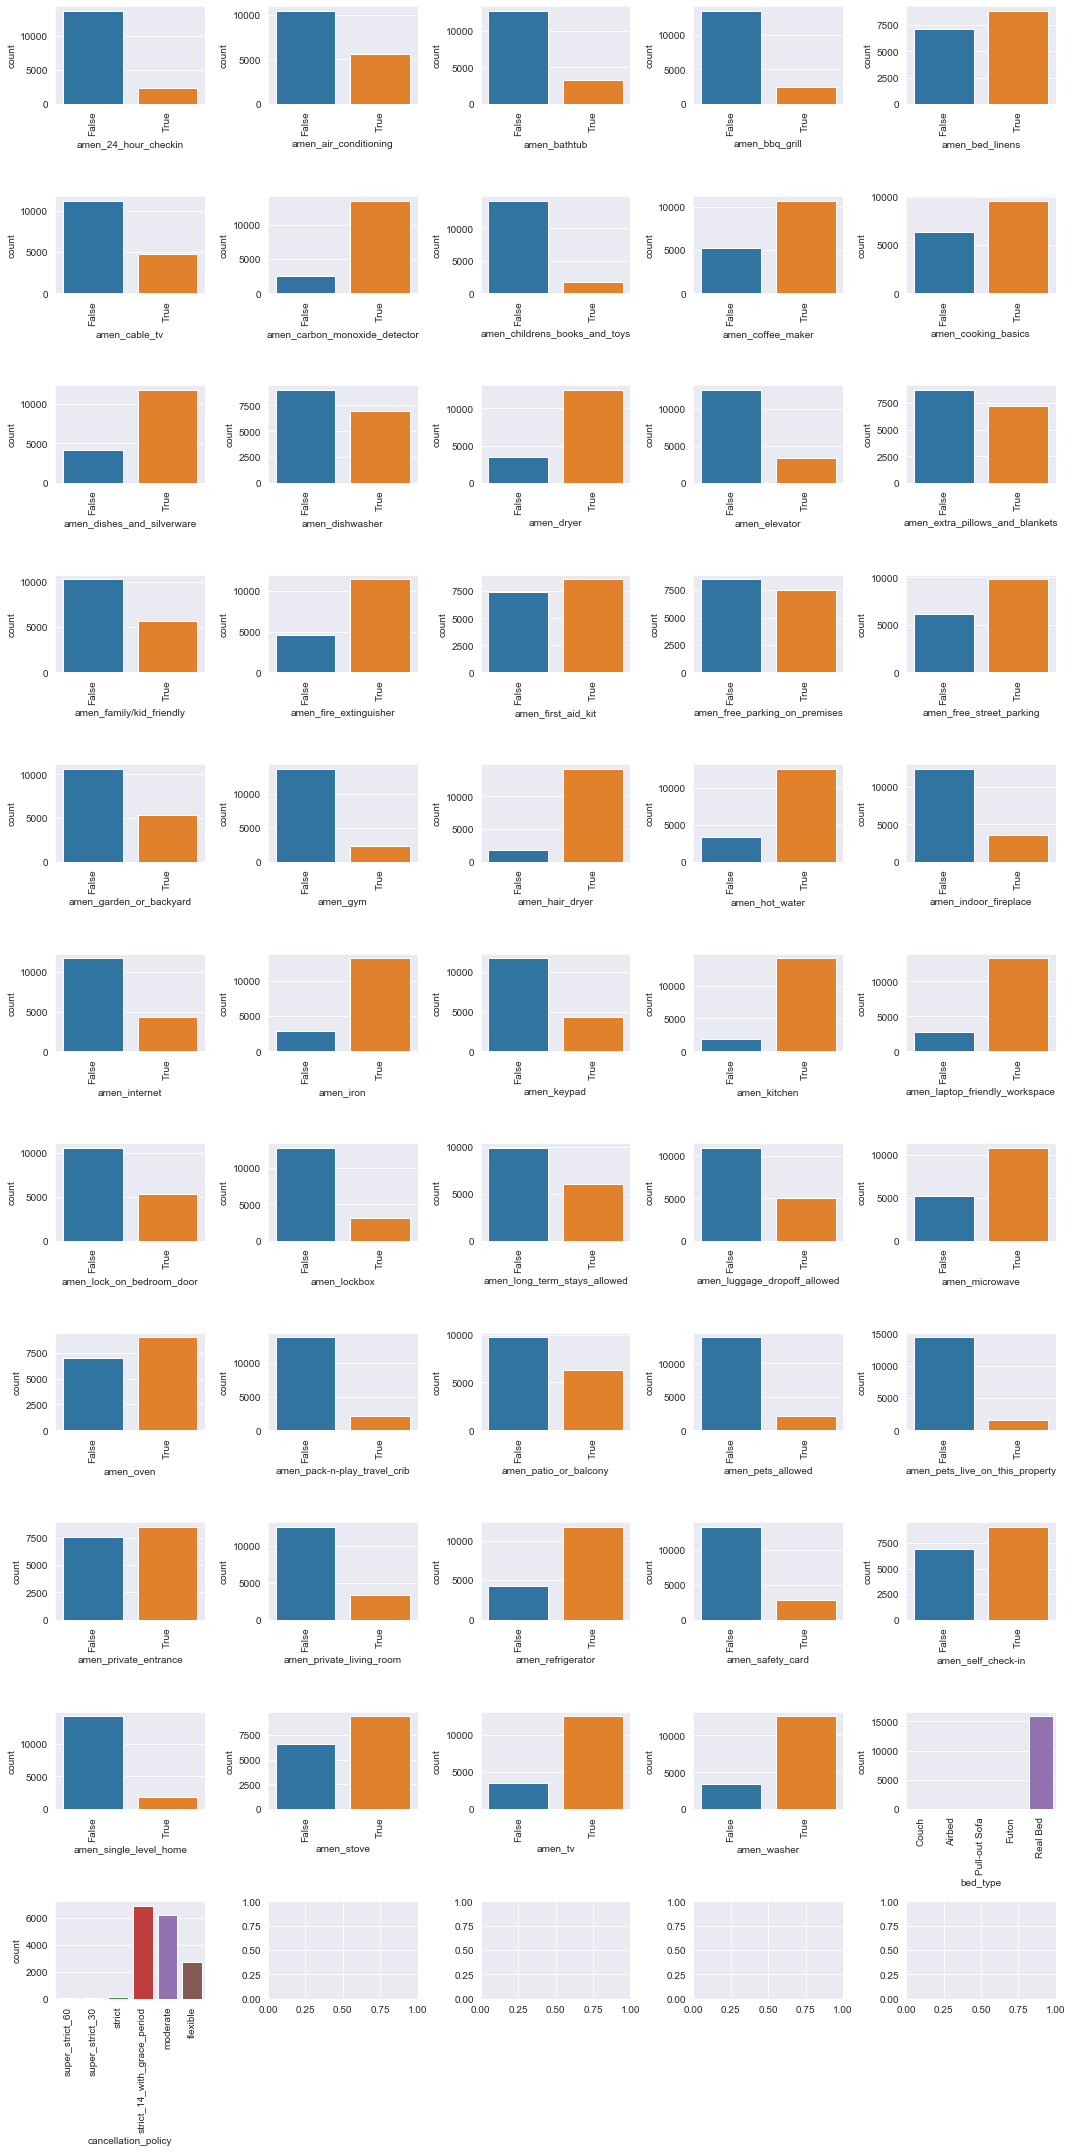

In [141]:
# distributions of amenities variables
plot_dists(ratings_df, 'cats', cat_cols[0:51], num_rows=11, num_cols=5, figsize=(15, 30))

The amenities variables are not too badly unbalanced. 

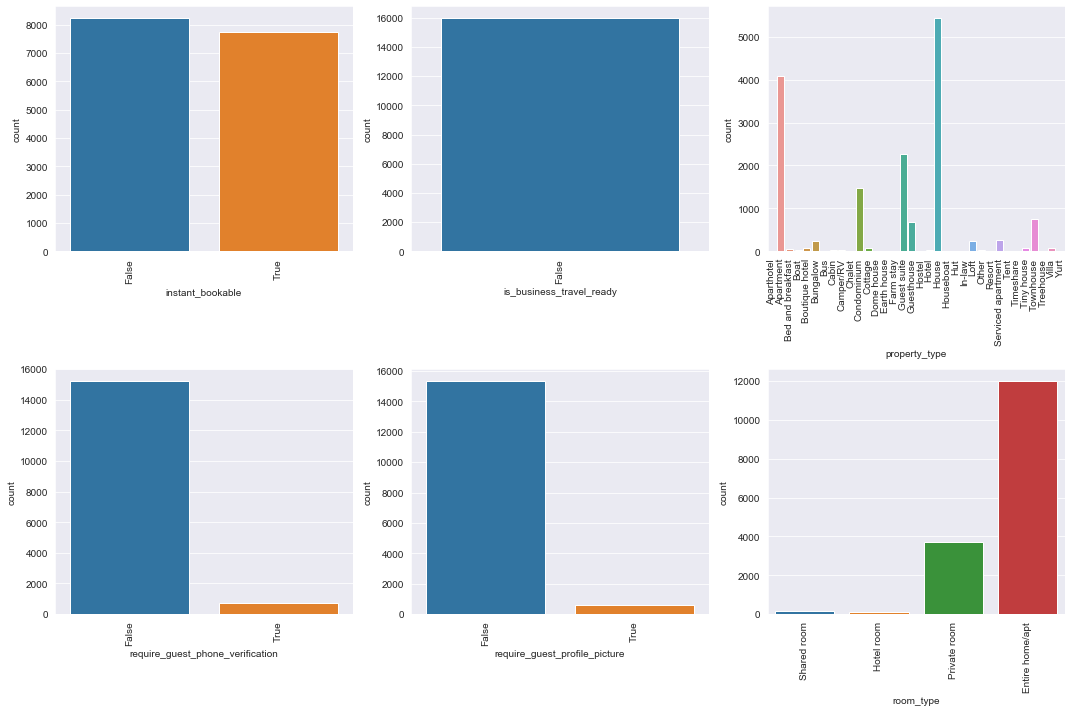

In [142]:
# distributions of other categorical variables
plot_dists(ratings_df, 'cats', cat_cols[52:], num_rows=2, num_cols=3, figsize=(15, 10))

Lets look at value counts of categorical variables which had values that didn't show up in the count plots:

In [143]:
ratings_df['bed_type'].value_counts()

Real Bed         15828
Futon               73
Pull-out Sofa       55
Airbed              17
Couch                6
Name: bed_type, dtype: int64

In [144]:
ratings_df['cancellation_policy'].value_counts()

strict_14_with_grace_period    6899
moderate                       6190
flexible                       2690
strict                          110
super_strict_30                  51
super_strict_60                  39
Name: cancellation_policy, dtype: int64

In [145]:
ratings_df['host_response_time'].value_counts()

within an hour        13657
within a few hours     1524
within a day            798
a few days of more        0
Name: host_response_time, dtype: int64

In [146]:
ratings_df['is_business_travel_ready'].value_counts()

False    15979
Name: is_business_travel_ready, dtype: int64

We'll drop `is_business_travel_ready` since it only has one value, but leave the other features untouched for now (even though they're very unbalanced)

In [147]:
ratings_df = ratings_df.drop(columns=['is_business_travel_ready'])
cat_cols = cat_cols.drop('is_business_travel_ready')

### Exploring features vs. response

In [151]:
def plot_vs_response(ratings_df, response, var_kind, cols, num_rows, num_cols,
                     trans_dict={}, figsize=(15, 15), scatter_plot_kws={}, 
                     violin_plot_kws={}):
    
    ratings_df_cp = ratings_df.copy()
    
    if trans_dict:
        for col in trans_dict:
            try:
                ratings_df_cp.loc[:, col] = ratings_df_cp[col].apply(trans_dict[col])
            except:
                print(col)
    
    if var_kind == 'quants':
        fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=figsize)

        for (i, col) in enumerate(cols):
            sns.scatterplot(x=col, y=response, data=ratings_df_cp,
                            ax=axs[i//num_cols, i%num_cols], **scatter_plot_kws)
        
    if var_kind == 'cats':
        fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=figsize)
        cat_cols = ratings_df.columns[(ratings_df_cp.dtypes == 'bool') | 
                                      (ratings_df_cp.dtypes == 'category')]
        for (i, col) in enumerate(cols):
            ax=axs[i//num_cols, i%num_cols]
            sns.violinplot(x=col, y=response, data=ratings_df_cp,
                           ax=ax, **violin_plot_kws)
            ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

    fig.tight_layout()    

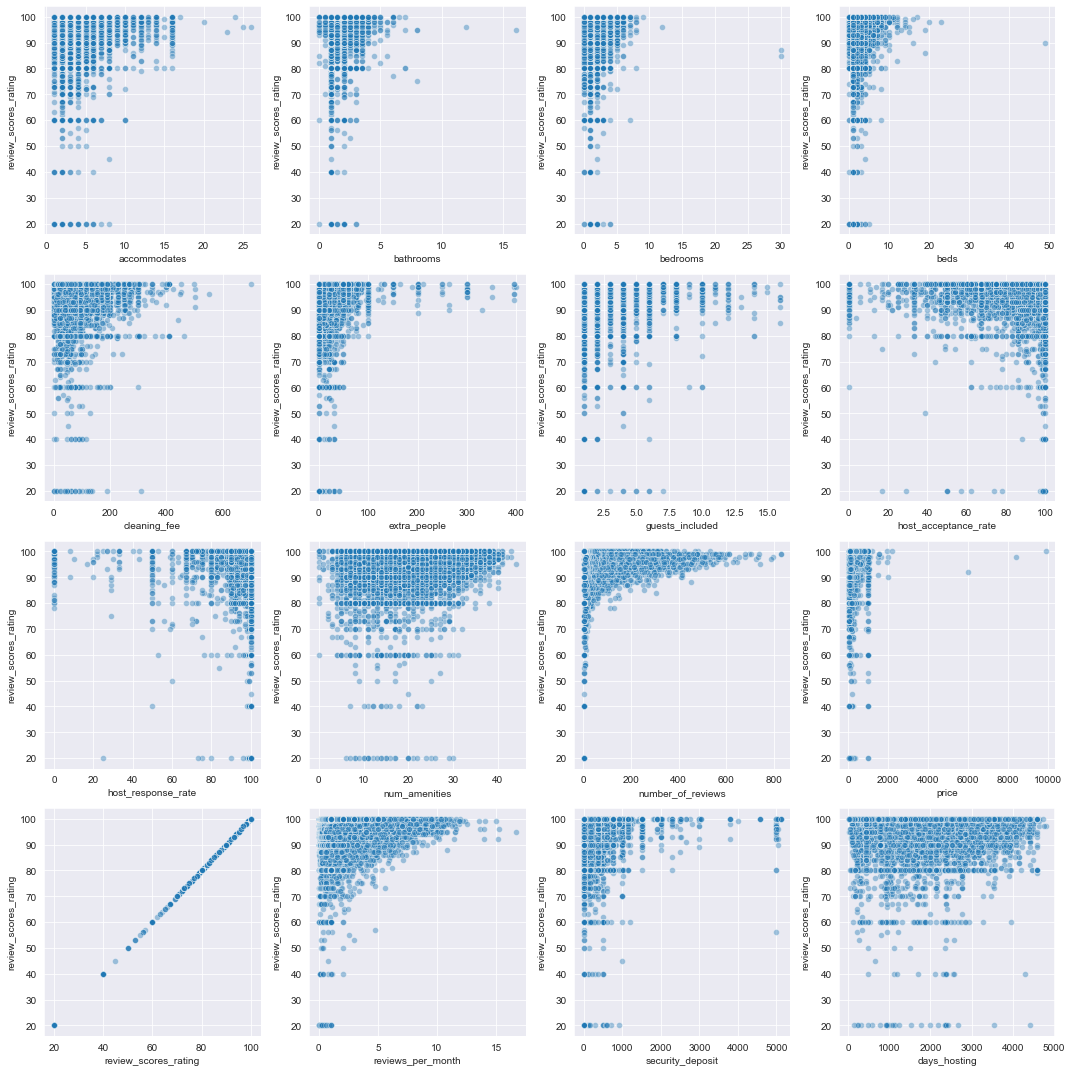

In [152]:
# plot quantitative features vs. response.
plot_vs_response(ratings_df, 'review_scores_rating', 'quants', quant_cols, num_rows=4, 
                 num_cols=4, scatter_plot_kws={'alpha': 0.4})

It's not hard to see the distribution of `review_scores_rating` reflected in some these scatterplots. For most of these features, there appears to be a positive relationship with the response (i.e., $\mathbb{E}(Y|X = x)$ increases as $x$ increases) but the relationship appears to be non-linear. It is interesting to note that `host_response_rate`and `host_acceptance_rate` seem to have a negative relationship to the response -- higher response or acceptance rate doesn't seem to be associated to higher rating, and some hosts with zero response or acceptance rate recieved high ratings.

Some of these scatterplots are highly concentrated -- let's look at scatterplots with the Box-Cox transformed quantitative variables.

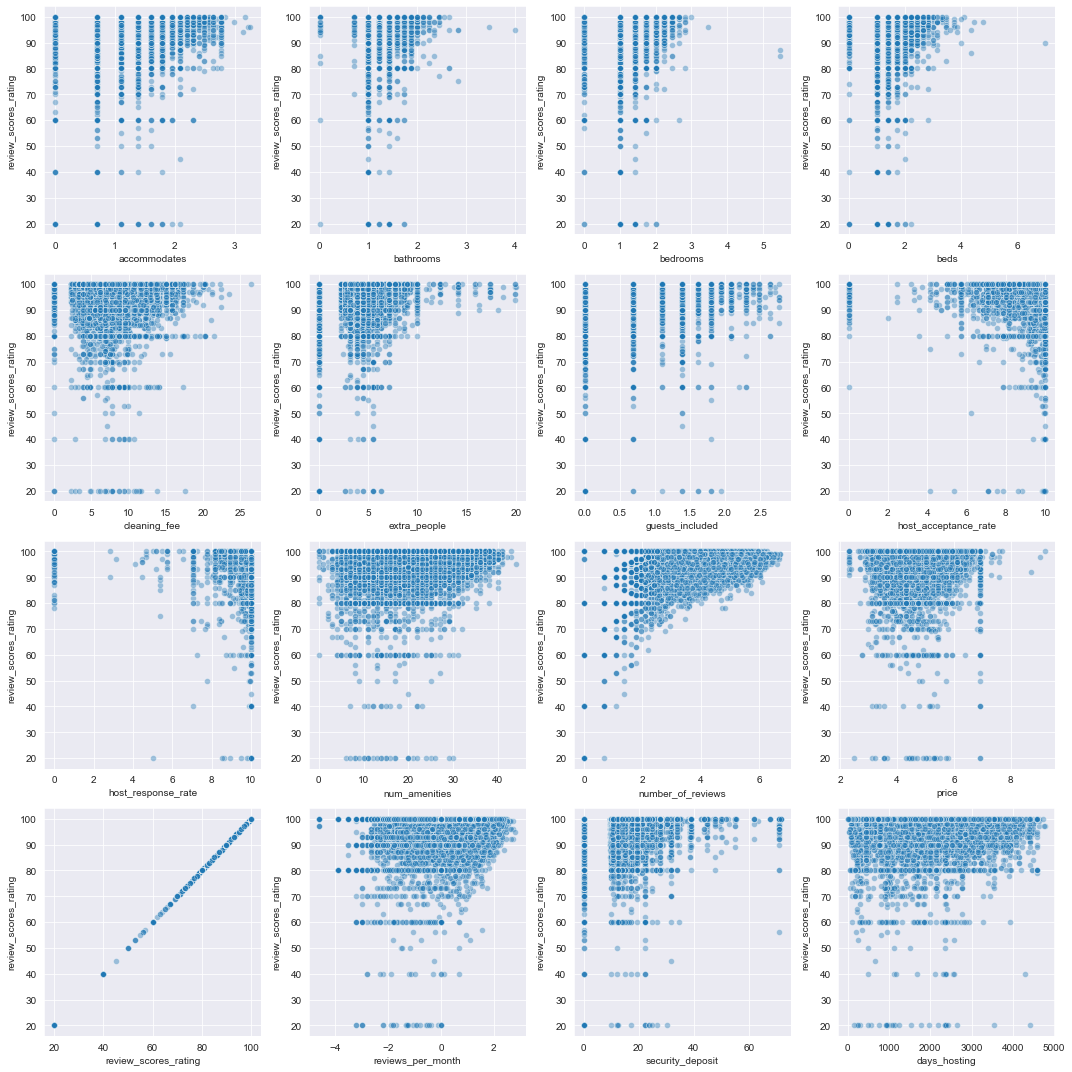

In [153]:
# plot Box-Cox transformed features vs. response
plot_vs_response(ratings_df, 'review_scores_rating', 'quants', quant_cols, 
                 num_rows=4, trans_dict=trans_dict, num_cols=4, 
                 scatter_plot_kws={'alpha': 0.4})

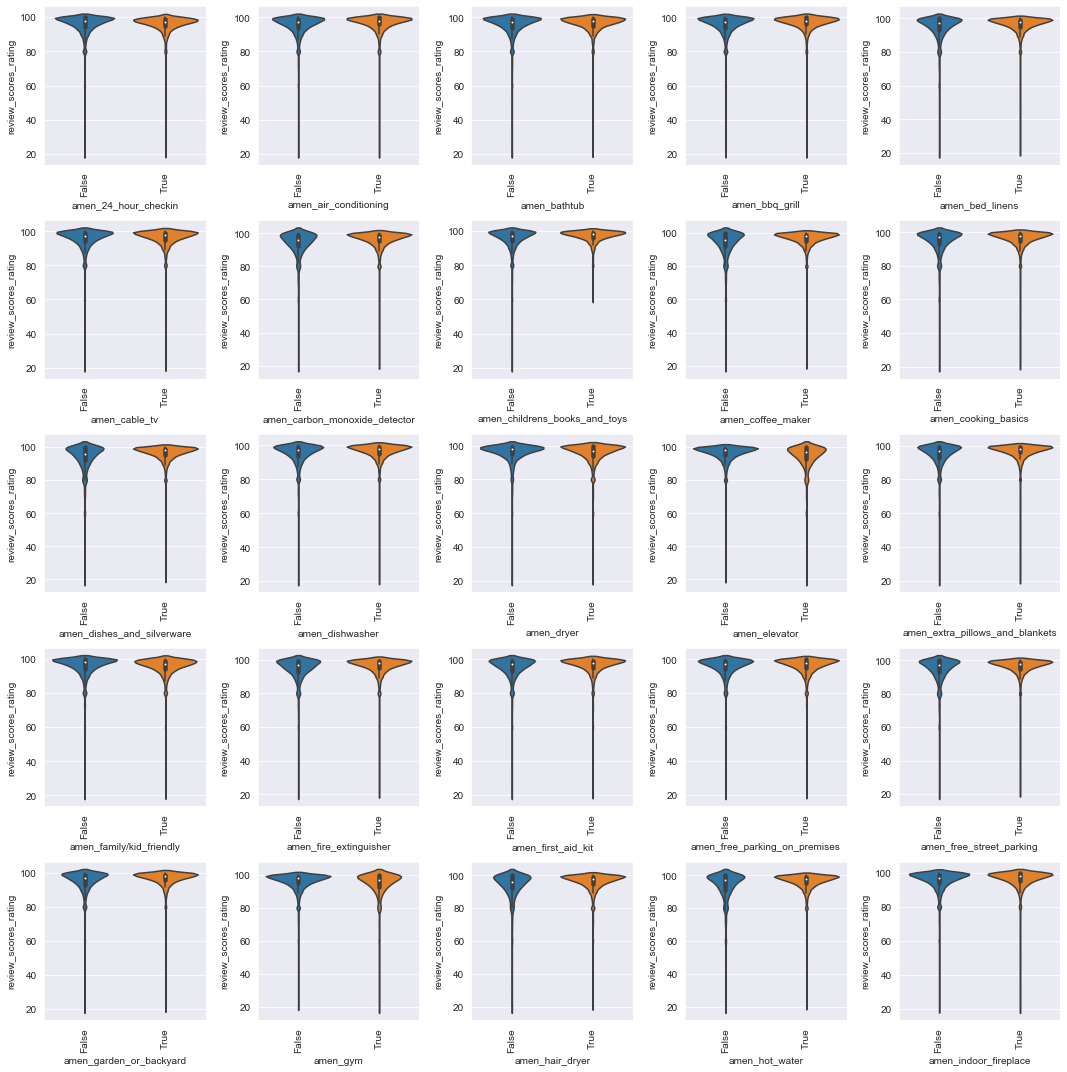

In [154]:
# plot first half of amenities features vs. response.
plot_vs_response(ratings_df, 'review_scores_rating', 'cats', cat_cols[0:25], num_rows=5, num_cols=5)

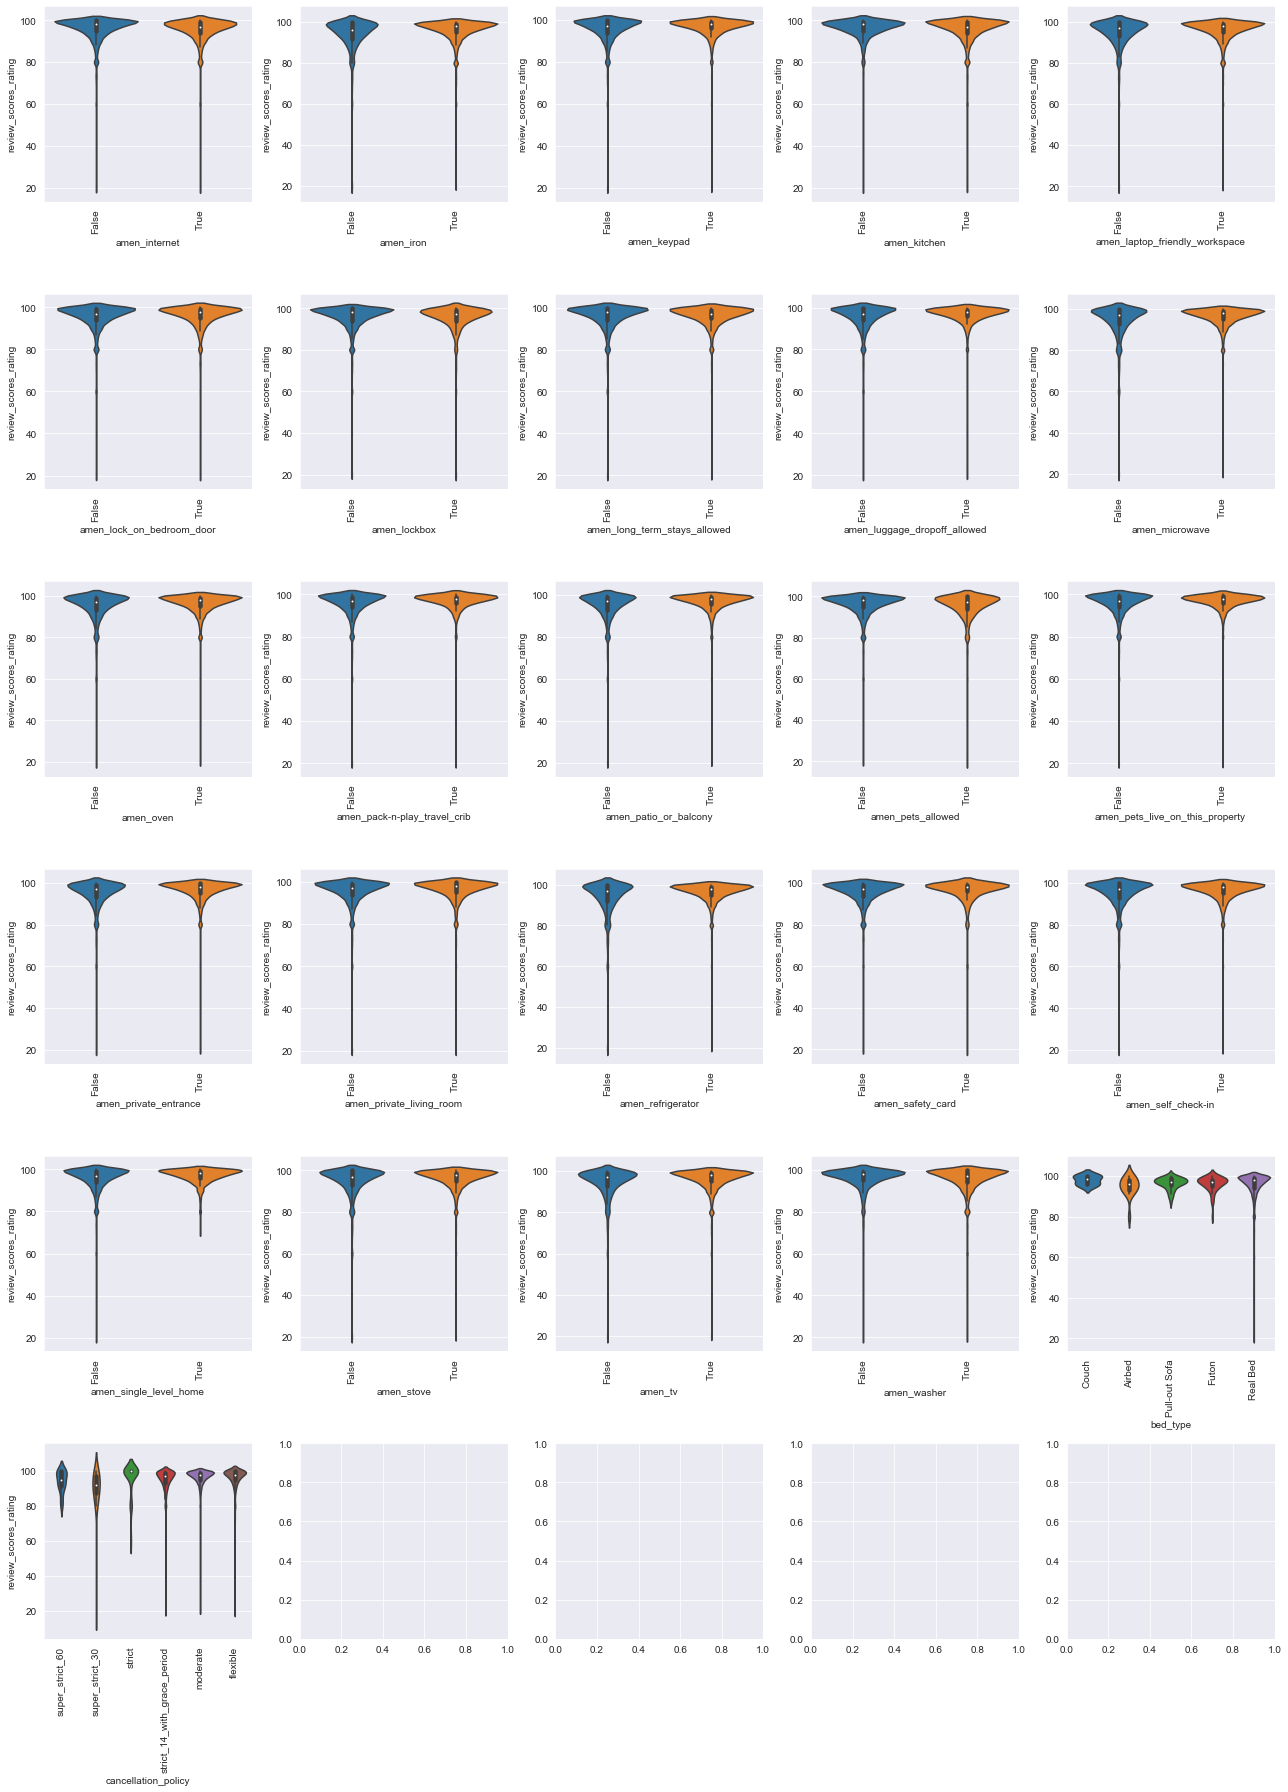

In [162]:
# plot second half of amenities features vs. response.
plot_vs_response(ratings_df, 'review_scores_rating', 'cats', cat_cols[25:51], 
                 num_rows=6, num_cols=5, figsize=(18, 25))

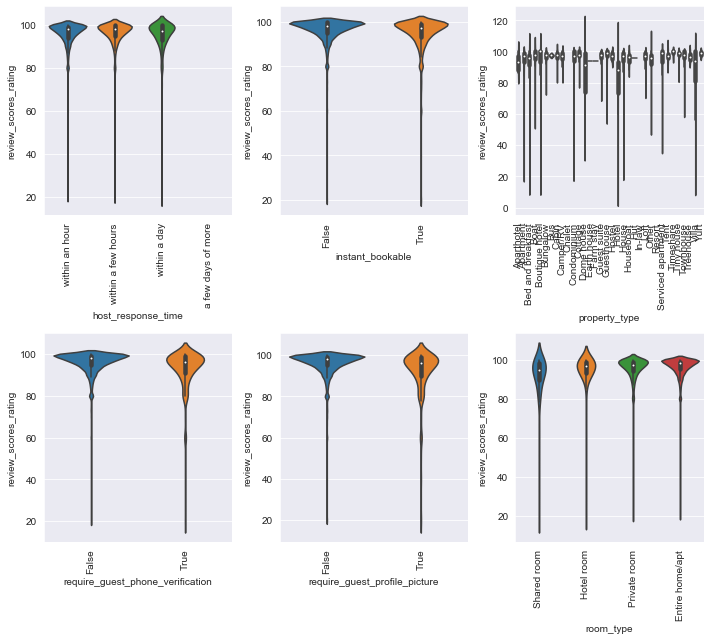

In [172]:
# plot other categorical features vs. response.
plot_vs_response(ratings_df, 'review_scores_rating', 'cats', cat_cols[51:], 
                 num_rows=2, num_cols=3, figsize=(10, 9))

### Prediction

As mentioned [previously](#How-does-guest-satisfaction-relate-to-location?), the fact that ratings are integers in the range 0-100 makes them an [interesting modeling challenge](http://rikunert.com/ordinal_rating). Ratings are ordered, so not really categorical, but also discrete, hence not continuous -- they are sometimes called ['ordered categorical'](http://users.stat.ufl.edu/~aa/ordinal/agresti_ordinal_tutorial.pdf). Various techniques exist for modeling ordinal categorical data, one that seems to be common is [ordinal regression](https://en.wikipedia.org/wiki/Ordinal_regression).

In our case, treating ratings as classes of a categorical variable is problematic. Because not all possible rating values are present in the dataset, any classification algorithm will be unable to learn the missing classes, making generalization difficult. With that in mind, we'll treat prediction of ratings as a regression problem.

#### `scikit-learn` regressors on original features

First we'll consider a handful of off-the-shelf scikit-learn regressors. We'll consider $R^2$ as a measure of goodness-of-fit, and [mean absolute error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score) as a measure of prediction accuracy. We'll use 5-fold cross validation to estimate these measures on train and test sets.

In [173]:
def features_and_response(ratings_df, trans_dict={}):
    """Create train and test data."""
    # features 
    quant_df = ratings_df.drop(columns=['review_scores_rating']).select_dtypes(include='number')
    
    # apply transformations if present
    if trans_dict:
        for col in trans_dict:
            try:
                quant_df.loc[:, col] = quant_df[col].apply(trans_dict[col])
            except:
                print(col)

    # min max scale quantitative
    quant_df = (quant_df - quant_df.min())/\
               (quant_df.max() - quant_df.min())
    
    # one hot encode categorical
    cat_df = ratings_df.select_dtypes(include=['bool', 'category'])
    cat_df = pd.get_dummies(cat_df, columns=cat_df.columns, drop_first=True)
    
    # train test split
    X = pd.concat([quant_df, cat_df], axis=1)
    y = ratings_df['review_scores_rating']

    return X, y

In [174]:
# get feature and response
X, y = features_and_response(ratings_df)

In [175]:
def cv_score_ests(ests, X, y, cv=5, n_jobs=-1, cv_params={}):
    """Fit and score regression estimators."""
   
    scores = {est: None for est in ests}
            
    for est in ests:
        print(f"Now cross-validating {est}:")
        
        # cross-validate
        scores[est] = cross_validate(ests[est], X, y, scoring=('r2', 'neg_mean_absolute_error'),
                                     return_train_score=True, cv=cv, n_jobs=n_jobs, **cv_params)
        # total fit and score times
        print(f"\tTotal fit time {scores[est]['fit_time'].sum()} seconds")
        print(f"\tTotal score time {scores[est]['score_time'].sum()} seconds")
        
    return scores

def get_scores_df(scores):
    """Convert cross_validation score results to dataframe."""
    scores_df = pd.DataFrame(columns=['train_r2_cv', 'test_r2_cv', 
                                      'train_mae_cv', 'test_mae_cv'], 
                          index=list(scores.keys()))

    for est in scores:
        scores_df.loc[est]['train_r2_cv'] = np.mean(scores[est]['train_r2'])
        scores_df.loc[est]['train_mae_cv'] = np.mean(-scores[est]['train_neg_mean_absolute_error'])
        scores_df.loc[est]['test_r2_cv'] = np.mean(scores[est]['test_r2'])
        scores_df.loc[est]['test_mae_cv'] = np.mean(-scores[est]['test_neg_mean_absolute_error'])
        
    return scores_df

In [176]:
# cross-validation scores for sklearn regressors
random_state= 27
skl_reg_names = ['dummy_reg', 'rf_reg', 'knn_reg', 'svm_reg', 'mlp_reg']
skl_reg_ests = [DummyRegressor(strategy='quantile', quantile=0.8),
                RandomForestRegressor(n_jobs=-1, random_state=random_state),
                KNeighborsRegressor(3, n_jobs=-1),
                SVR(),
                MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=2000)]
skl_regs = {skl_name: skl_est for (skl_name, skl_est) 
                 in zip(skl_reg_names, skl_reg_ests)}
skl_cv_scores = cv_score_ests(skl_regs, X, y)

Now cross-validating dummy_reg:
	Total fit time 0.08077192306518555 seconds
	Total score time 0.00862574577331543 seconds
Now cross-validating rf_reg:
	Total fit time 188.30176401138306 seconds
	Total score time 0.2575101852416992 seconds
Now cross-validating knn_reg:
	Total fit time 3.506889581680298 seconds
	Total score time 91.79355835914612 seconds
Now cross-validating svm_reg:
	Total fit time 387.5005967617035 seconds
	Total score time 85.60344934463501 seconds
Now cross-validating mlp_reg:
	Total fit time 927.8406467437744 seconds
	Total score time 0.24310827255249023 seconds


#### `xgboost` regressors on original features.

We'll also try a few `xgboost` regressors.

In [177]:
# cross-validation scores for xgb regressors
xgb_regs = {'xgb_reg_gbtree': XGBRegressor(objective='reg:squarederror', n_jobs=-1,
                                           random_state=random_state,
                                           booster='gbtree'),
        'xgb_reg_dart': XGBRegressor(objective='reg:squarederror', n_jobs=-1,
                                     random_state=random_state,
                                     booster='dart'),
        'xgb_rf_reg': XGBRFRegressor(objective='reg:squarederror', n_jobs=-1,
                                            random_state=random_state),        
       }
xgb_cv_scores = cv_score_ests(xgb_regs, X, y)

Now cross-validating xgb_reg_gbtree:
	Total fit time 127.19547653198242 seconds
	Total score time 0.4192464351654053 seconds
Now cross-validating xgb_reg_dart:
	Total fit time 173.1870722770691 seconds
	Total score time 0.381619930267334 seconds
Now cross-validating xgb_rf_reg:
	Total fit time 60.614177227020264 seconds
	Total score time 0.3912167549133301 seconds


#### `scikit-learn` and `xgboost` regressors on transformed quantitative features

Now we'll train the same estimators with the Box-Cox transformations applied to the quantitative features.

In [178]:
# cross-validation scores for sklearn regressors on transformed quantitative features
X_tr, y_tr = features_and_response(ratings_df, trans_dict=trans_dict)
skl_tr_cv_scores = cv_score_ests(deepcopy(skl_regs), X_tr, y_tr)

Now cross-validating dummy_reg:
	Total fit time 0.22921514511108398 seconds
	Total score time 0.11698532104492188 seconds
Now cross-validating rf_reg:
	Total fit time 392.9649088382721 seconds
	Total score time 0.6730427742004395 seconds
Now cross-validating knn_reg:
	Total fit time 5.470238447189331 seconds
	Total score time 139.15924906730652 seconds
Now cross-validating svm_reg:
	Total fit time 383.95023369789124 seconds
	Total score time 88.58065724372864 seconds
Now cross-validating mlp_reg:
	Total fit time 2479.512115955353 seconds
	Total score time 0.6705708503723145 seconds


In [180]:
# cross-validation scores for xgboost regressors on transformed quantitative features
xgb_tr_cv_scores = cv_score_ests(deepcopy(xgb_regs), X_tr, y_tr)

Now cross-validating xgb_reg_gbtree:
	Total fit time 79.85912299156189 seconds
	Total score time 0.23249483108520508 seconds
Now cross-validating xgb_reg_dart:
	Total fit time 86.58256101608276 seconds
	Total score time 0.3087317943572998 seconds
Now cross-validating xgb_rf_reg:
	Total fit time 32.99137830734253 seconds
	Total score time 0.25188732147216797 seconds


### Evaluation

In [181]:
# scores for regressors on original features
cv_scores_df = pd.concat([get_scores_df(skl_cv_scores), 
                          get_scores_df(xgb_cv_scores)])
cv_scores_df.sort_values(by='test_mae_cv')

,train_r2_cv,test_r2_cv,train_mae_cv,test_mae_cv
svm_reg,0.0989352,0.0440145,3.11877,3.37781
xgb_reg_gbtree,0.283062,0.090087,3.36763,3.61091
xgb_reg_dart,0.283062,0.090087,3.36763,3.61091
rf_reg,0.872611,0.0392426,1.30534,3.69346
xgb_rf_reg,0.0851254,0.0172077,3.80102,3.8438
knn_reg,0.477698,-0.196441,2.68117,4.10671
dummy_reg,-0.435698,-0.487574,4.42575,4.42581
mlp_reg,0.482781,-0.337821,3.0869,4.58315


The support vector regressor achieved the lowest MAE, but with a very low $R^2$ on both train and test. However, in this case MAE and $R^2$ are both similar on train and test, indicating a low chance of overfitting. Decision trees and random forest regressors were next best, and appear to be overfitting giving the differences between train and test performance. 

The dummy regressor, which predicts the 0.8 quantile, achieves the worst MAE of $\approx 4.64$. The `xgboost` MAE scores have a good balance between train and test MAE (hence lower chance of overfitting).

The random forest regressor has a very high train $R^2$ relative to the others, while its test $R^2$ is comparable to the `xgboost` decision trees, which have a better train-test balance.  K-nearest neighbors, dummy and neural network regressors all have negative test $R^2$. 

Now let's take a look at performance of the same estimators with the transformed quantitative features.

In [182]:
# scores for regressors on transformed quantitative features
cv_tr_scores_df = pd.concat([get_scores_df(skl_tr_cv_scores), 
                             get_scores_df(xgb_tr_cv_scores)])
cv_tr_scores_df.sort_values(by='test_mae_cv')

,train_r2_cv,test_r2_cv,train_mae_cv,test_mae_cv
svm_reg,0.0705476,0.0123341,3.05736,3.32316
xgb_reg_gbtree,0.283062,0.0900792,3.36763,3.61099
xgb_reg_dart,0.283062,0.0900792,3.36763,3.61099
rf_reg,0.872989,0.0422299,1.30385,3.69028
xgb_rf_reg,0.0851254,0.0172077,3.80102,3.8438
knn_reg,0.486047,-0.145304,2.64827,4.02214
dummy_reg,-0.435698,-0.487574,4.42575,4.42581
mlp_reg,0.588182,-0.506876,2.70681,4.5025


In [183]:
# change in measures after transforming quantitative features
cv_tr_scores_df - cv_scores_df

,train_r2_cv,test_r2_cv,train_mae_cv,test_mae_cv
dummy_reg,0,0,0,0
rf_reg,0.000377536,0.00298736,-0.00148491,-0.0031827
knn_reg,0.00834828,0.0511373,-0.0329024,-0.0845673
svm_reg,-0.0283876,-0.0316803,-0.0614091,-0.0546447
mlp_reg,0.105401,-0.169055,-0.380083,-0.0806514
xgb_reg_gbtree,0,-7.86682e-06,0,7.53022e-05
xgb_reg_dart,0,-7.86682e-06,0,7.53022e-05
xgb_rf_reg,0,0,0,0


There's a slight performance improvement for all the `scikit-learn` regressors except the dummy regressor when fit with the transformed quantitative features.

### Interpretation

Our main purpose was to get a sense of which features are most important. 
Tree-based models performed fairly well relative to other models, and have the benefit of being relatively straightforward to interpret, so we'll focus on these models.
Specifically, we'll look at the `scikit-learn` random forest regressor and the `xgboost` dart and gradient boosted regressor fit on the transformed features.

Let's visualize their feature importances.

In [184]:
def plot_feature_importances(tree_ests, cols, nrows, num_features, figsize=(10, 20)):
    """Plot top feature importances for tree-based estimators."""
    # set of importances
    importances = {}
    fig, axs = plt.subplots(nrows, figsize=figsize)
    
    for (i, est) in enumerate(tree_ests):
        ax=axs[i]
        df = pd.DataFrame({'importance': tree_ests[est].feature_importances_}, 
                          index=cols)\
             .sort_values(by='importance', ascending=False).head(num_features)
        df.plot(kind='bar', ax=ax)
        ax.set_title(est + f' top {num_features} feature importances')
        # track importances
        importances[est] = df.index
        
    fig.tight_layout()
    
    return importances

In [185]:
# fit tree estimators
tree_ests = {'rf_reg': skl_regs['rf_reg'], 'xgb_reg_gbtree': xgb_regs['xgb_reg_gbtree']}
for est in tree_ests:
    tree_ests[est].fit(X, y)

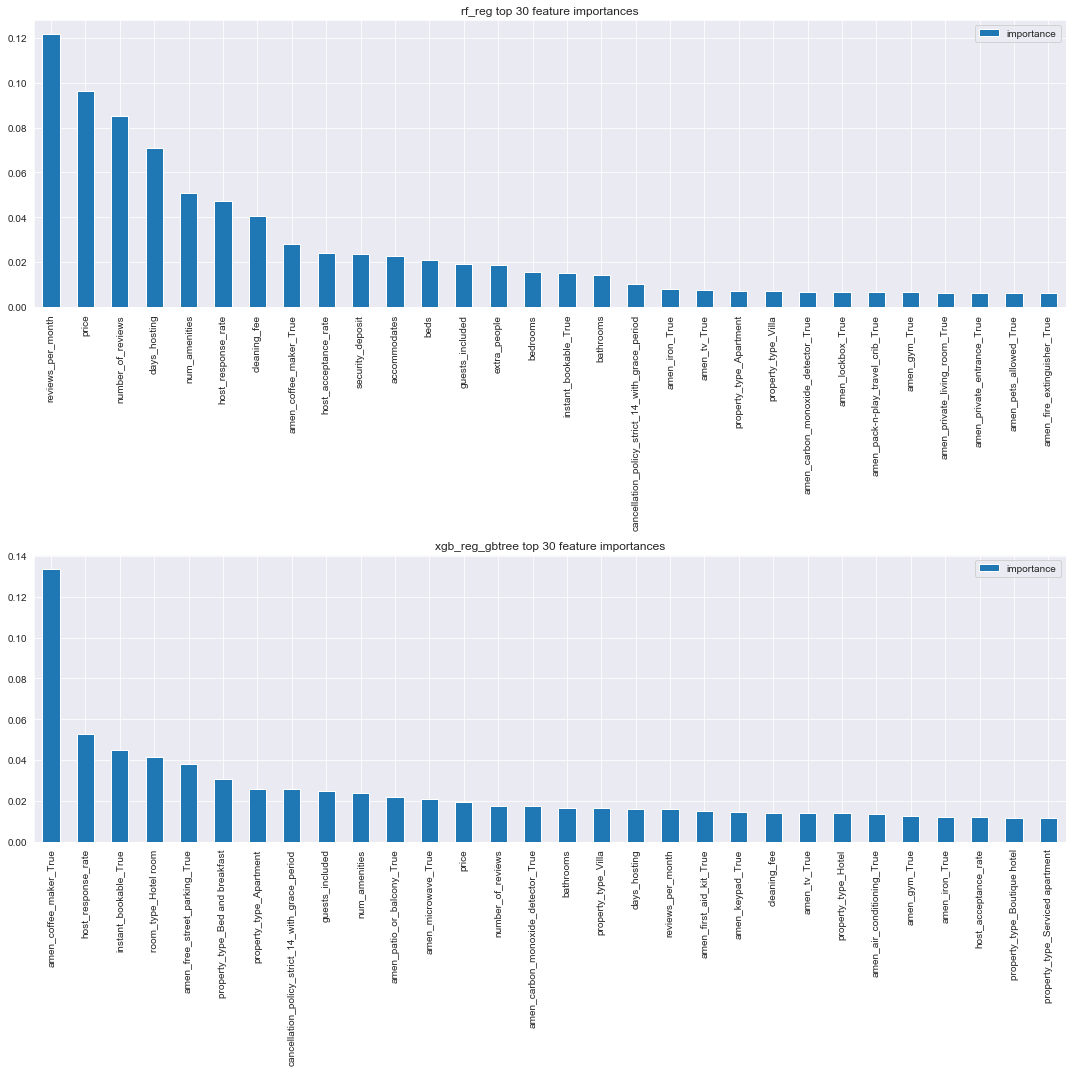

In [187]:
# plot feature importances
top_30_importances = plot_feature_importances(tree_ests, cols=X.columns, nrows=2,
                                              num_features=30, figsize=(15, 15))

There is some clear difference between the features here. The `xgboost` decision tree estimator has really favored the amenities features. 

Common sense suggests the `xgboost` estimator has learned less meaningful associations to the response (e.g. the presence of a coffee maker, or the fact that a guest profile picture is required). 

In the interest of our goal of interpretatibility then, we'll select the `sklearn` random forest model as our final model.

### Model Improvement

So far our best prediction performance, as measured by cv estimate of test MAE, was $\approx 3.5$ for the support vector machine. For the sake of interpretability, we selected the random forest model with cv estimate of test mae of $\approx 3.8$, which had a very high cv train $R^2$ estimate relative to the other models.

All models had abysmal $R^2$ however, suggesting plenty of room for improvement. Some possibilites to explore to improve model fit and prediction performance:
    
(1) Hyperparameter tuning

(2) Further feature transformation, selection and engineering, including revisiting the original dataset, or including new features. One promising option might be natural language processing on some of the string features in `listings` dataset (e.g. `description`) or on actual reviews (full text reviews for listings are available at [InsideAirbnb](http://insideairbnb.com/get-the-data.html).

(3) Ensemble methods for combining estimators.

(4) Finding models better suited to the range and distribution of the response (e.g. other ordinal regression models such as [beta regression](https://www.ime.usp.br/~sferrari/beta.pdf)).

We may explore these options in the future but for now we've met our goal of finding a predictive model which can help us get a sense of which features are most closely related to guest satisfaction.

### Conclusions

Based on the random forest model, the top 10 most important features are

In [188]:
pd.Series(top_30_importances['rf_reg'])[:10]

0         reviews_per_month
1                     price
2         number_of_reviews
3              days_hosting
4             num_amenities
5        host_response_rate
6              cleaning_fee
7    amen_coffee_maker_True
8      host_acceptance_rate
9          security_deposit
dtype: object

None of these are perhaps too surprising (except maybe the presence of a coffee maker!).  It's interesting to note the presence of `host_response_rate` and `host_acceptance_rate` among the top feature importances. We noted [above](#Exploring-features-vs.-response) a somewhat suprising negative assocation with the response, and their presence here is one possible indication of the strength of that relationship.

We can speculate a bit about why these feature associations are ranked highly.

Reviews per month and number of reviews seem reasonable -- listings with higher reviews may be more frequently booked and hence more frequently reviewed. Price, cleaning fee and security deposit may have association to quality factors such as value of property (as well as to each other). Days hosting or number of amenities might be associated to positive guest experience. 

Further investigation of these assocations can help shed light on these speculations.